<a href="https://colab.research.google.com/github/EricChang9/MCM-Problem-C-2024/blob/main/MCM_Problem_C_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Data Cleaning

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/MCM Problem C/Resources/Data/Wimbledon_featured_matches.csv")
matchIds = df['match_id'].unique()
match_data = []
for match in matchIds:
  match_data.append(df[df['match_id'] == match].reset_index())

for match in match_data:
  file_name = match["match_id"][0]
  match.to_csv(f"/content/drive/MyDrive/MCM Problem C/Resources/Data/Matches/{file_name}")

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/MCM Problem C/Resources/Data/Wimbledon_featured_matches.csv")
matchIds = df['match_id'].unique()
match_data = []
for match in matchIds:
    match_data.append(df[df['match_id'] == match])

smoothing16 = (2 / (16 + 1))
smoothing26 = (2 / (26 + 1))

for match in match_data:
  p1_points = []
  p2_points = []
  for index, row in match.iterrows():
    if row['point_victor'] == 1:
      if row['server'] == 1:
        p1_points.append(1)
        p2_points.append(-0.25)
      else:
        p1_points.append(1.5)
        p2_points.append(-1)
    if row['point_victor'] == 2:
      if row['server'] == 2:
        p2_points.append(1)
        p1_points.append(-0.25)
      else:
        p2_points.append(1.5)
        p1_points.append(-1)

  ema_p1 = pd.Series(p1_points).ewm(alpha=smoothing16).mean()
  ema_p2 = pd.Series(p2_points).ewm(alpha=smoothing16).mean()

  ema2_p1 = pd.Series(p1_points).ewm(alpha=smoothing26).mean()
  ema2_p2 = pd.Series(p2_points).ewm(alpha=smoothing26).mean()
  diff = ema_p1 - ema_p2
  diff2 = ema2_p1 - ema2_p2
  macd = diff - diff2

  filtered_match = pd.DataFrame(match["point_no"])
  file_name = match["match_id"].iloc[0]
  filtered_match.set_index('point_no', inplace=True)
  filtered_match["Momentum"] = macd
  filtered_match.dropna(inplace=True)
  filtered_match.to_csv(f"/content/drive/MyDrive/MCM Problem C/Resources/Data/Matches/{file_name}.csv")


AttributeError: 'str' object has no attribute 'iterrows'

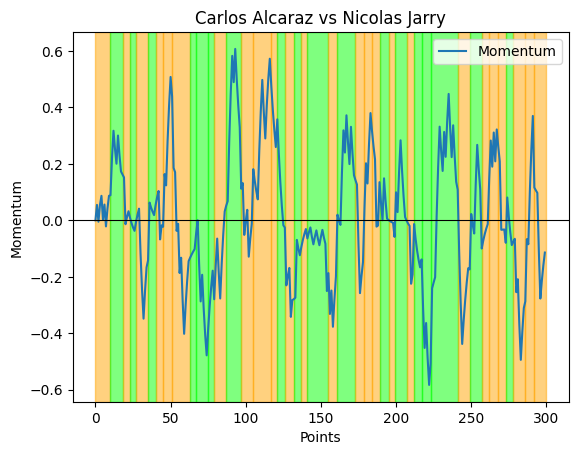

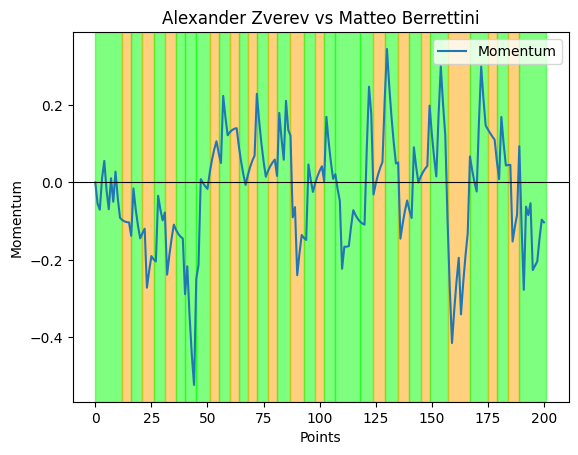

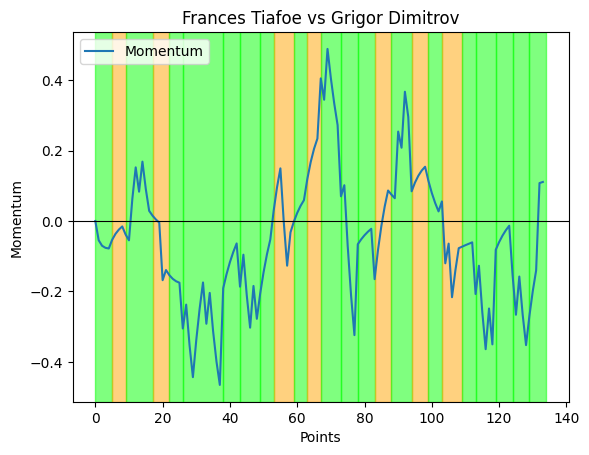

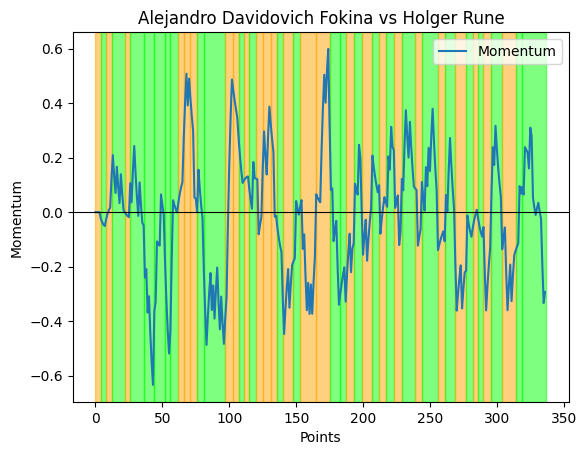

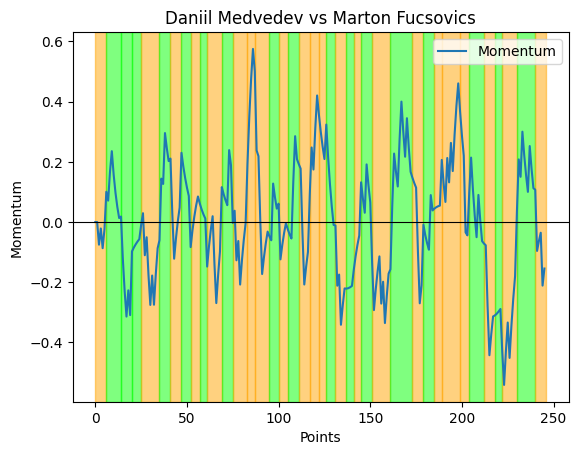

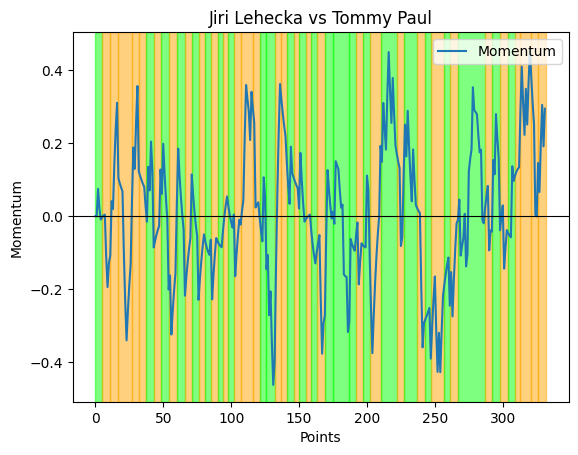

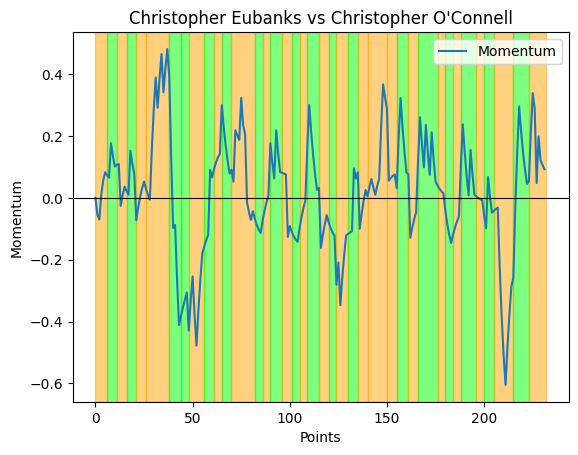

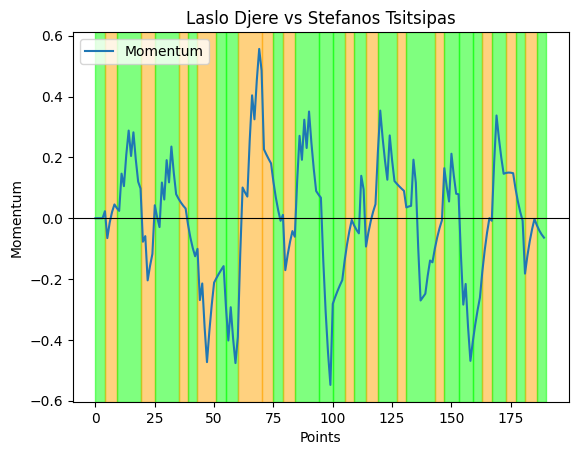

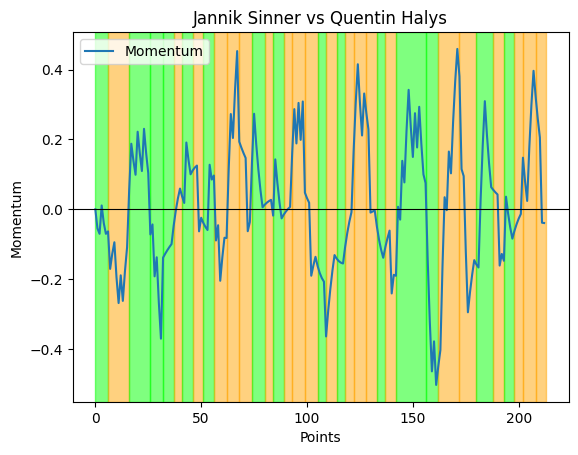

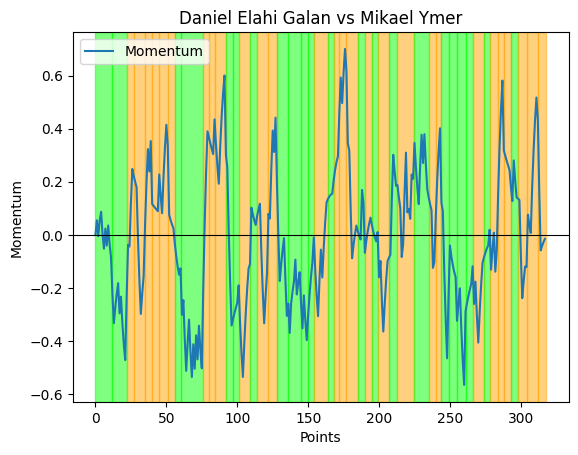

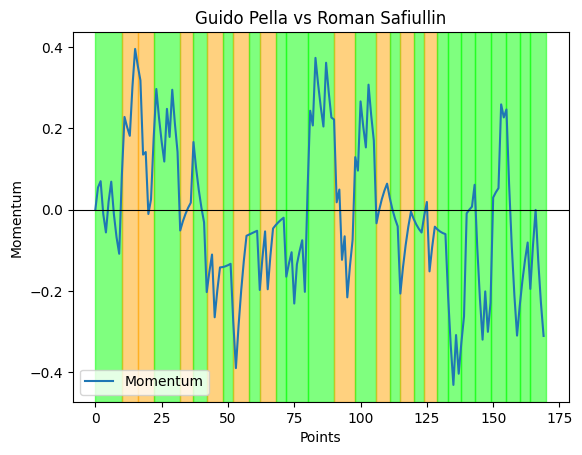

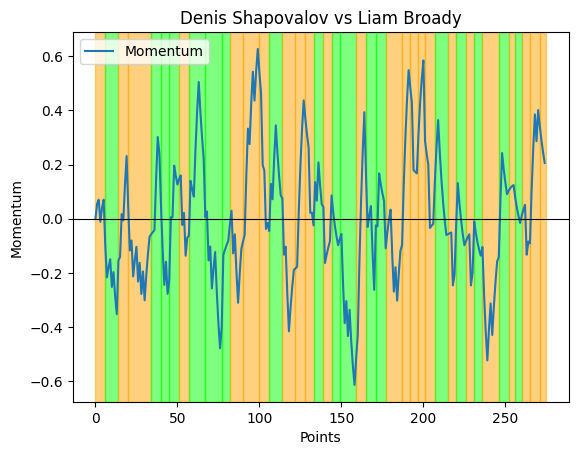

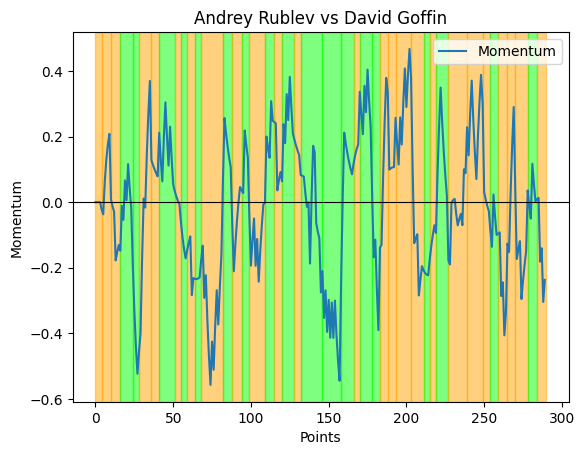

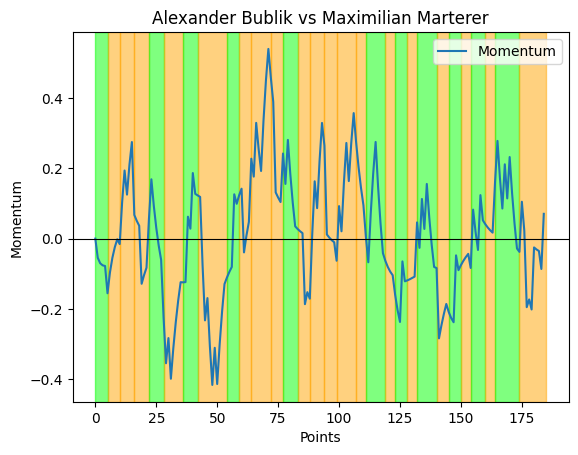

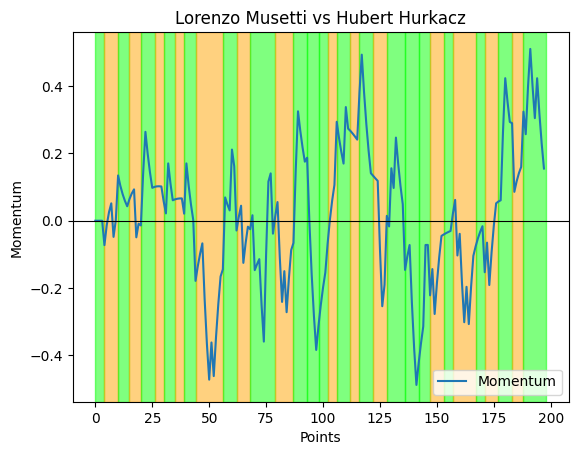

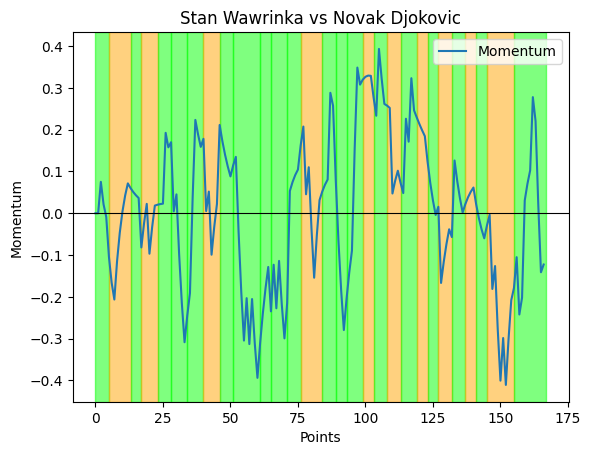

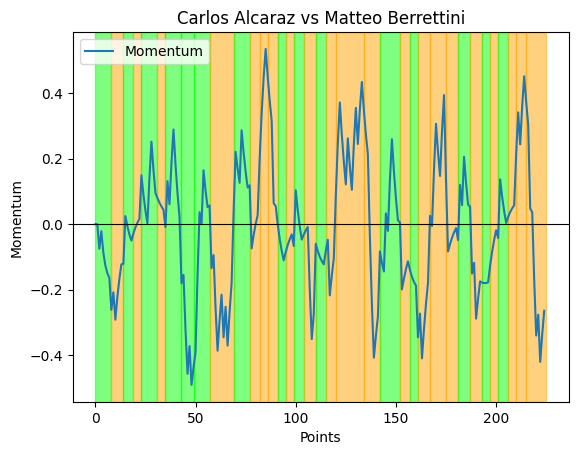

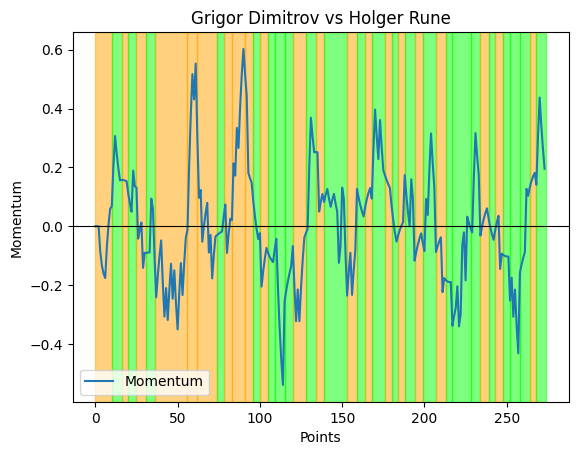

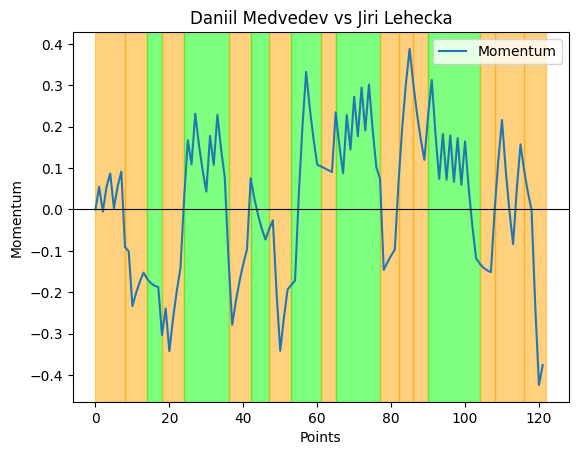

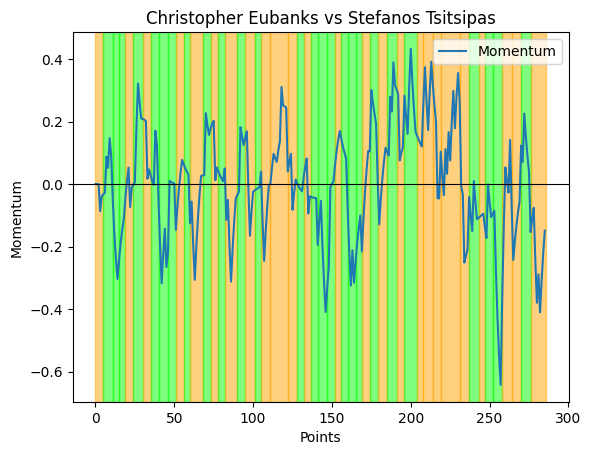

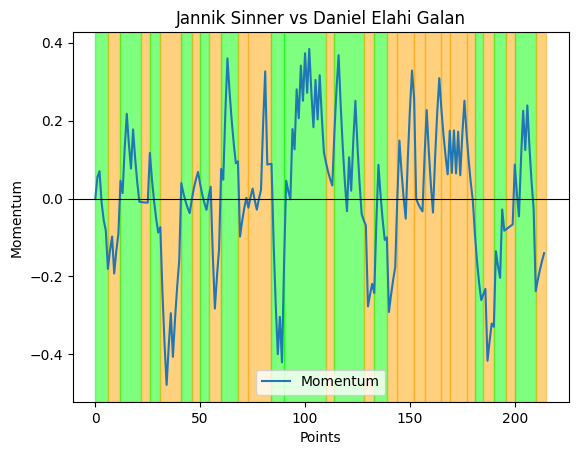

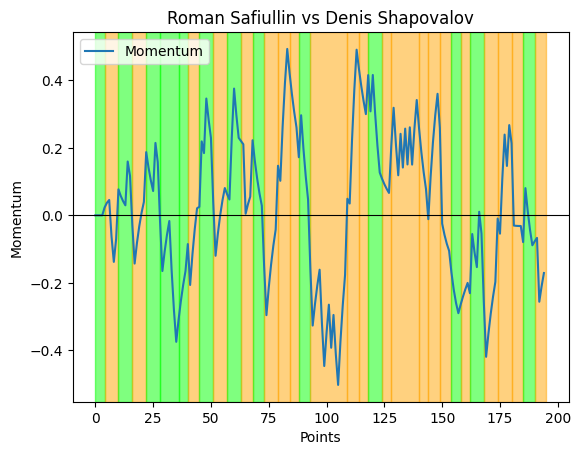

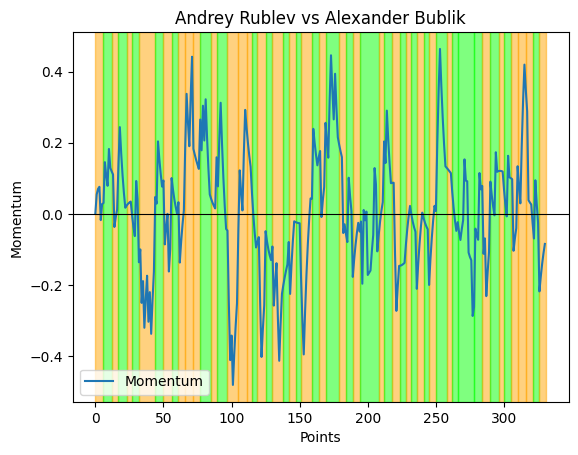

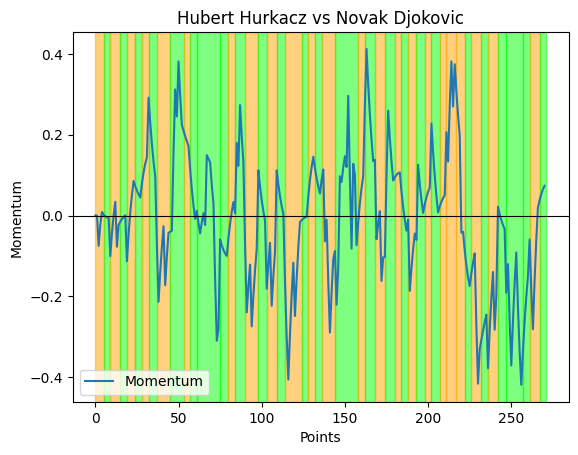

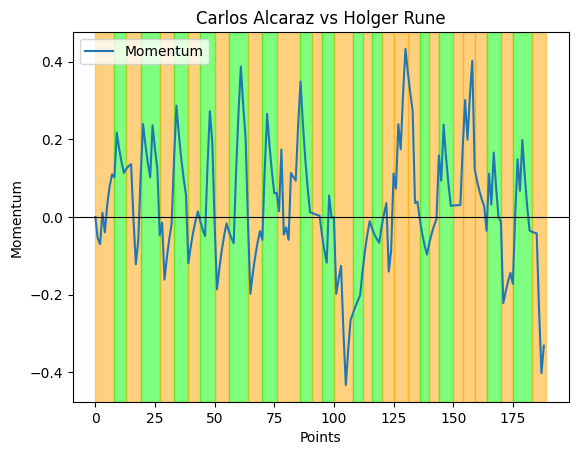

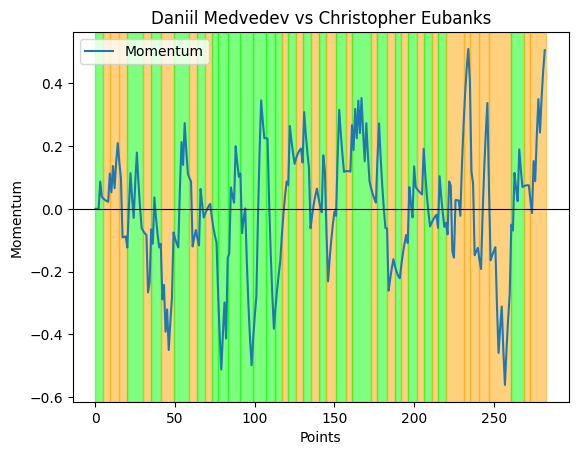

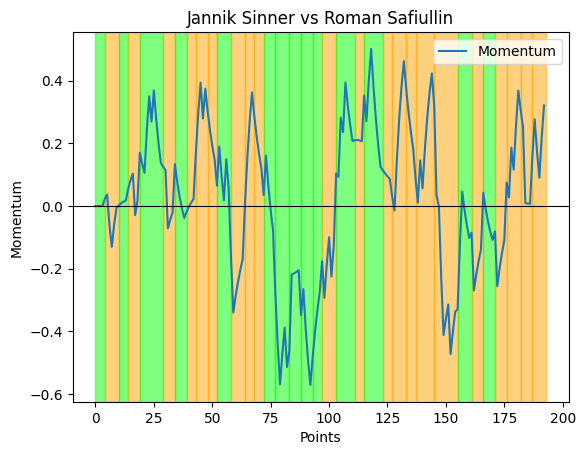

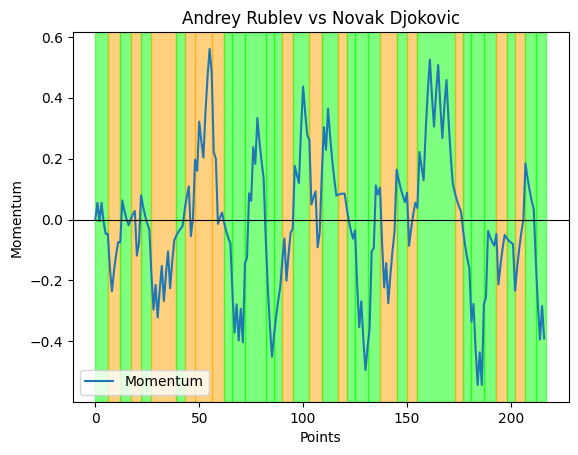

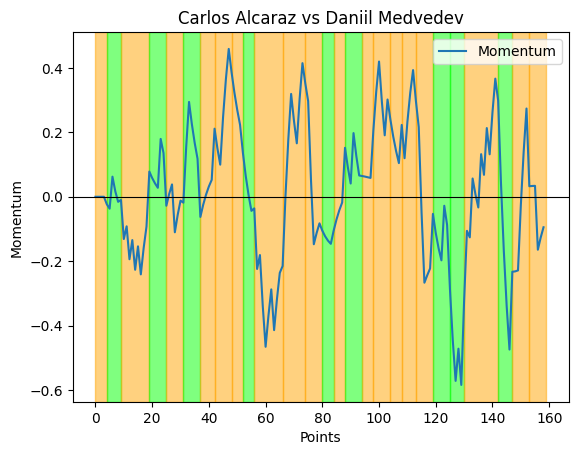

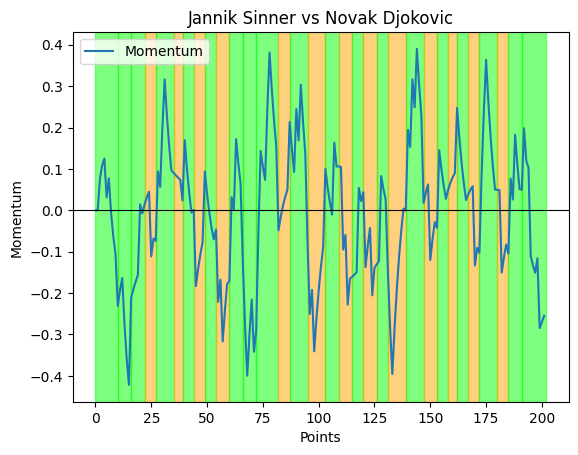

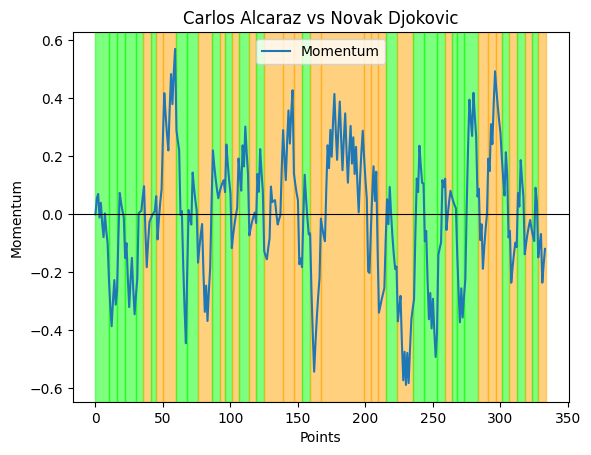

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/MCM Problem C/Resources/Data/Wimbledon_featured_matches.csv")
matchIds = df['match_id'].unique()
match_data = []
for match in matchIds:
  match_data.append(df[df['match_id'] == match].reset_index())


smoothing16 = (2/(16+1))
smoothing26 = (2/(26+1))

p1_points = []
p2_points = []
for match in match_data:
  for index, row in match.iterrows():
    if row['point_victor'] == 1:
      if row['server'] == 1:
        p1_points.append(1)
        p2_points.append(-0.25)
      else:
        p1_points.append(1.5)
        p2_points.append(-1)
    if row['point_victor'] == 2:
      if row['server'] == 2:
        p2_points.append(1)
        p1_points.append(-0.25)
      else:
        p2_points.append(1.5)
        p1_points.append(-1)
  p1_points = pd.Series(p1_points)
  p2_points = pd.Series(p2_points)

  ema_p1 = p1_points.ewm(alpha = smoothing16).mean()
  ema_p2 = p2_points.ewm(alpha = smoothing16).mean()
  total_points_p1 = p1_points.cumsum()
  total_points_p2 = p2_points.cumsum()

  ema2_p1 = p1_points.ewm(alpha = smoothing26).mean()
  ema2_p2 = p2_points.ewm(alpha = smoothing26).mean()

  last_point = 0
  for index, row in match.iterrows():
    this_point = row['point_no']
    if (row['game_victor'] == 1):
      plt.axvspan(last_point, this_point, alpha = 0.5, color = 'orange')
      last_point = this_point
    if (row['game_victor'] == 2):
      plt.axvspan(last_point, this_point, alpha = 0.5, color = 'lime')
      last_point = this_point

  diff = ema_p1 - ema_p2
  diff2 = ema2_p1 - ema2_p2
  macd = diff - diff2
  plt.plot(macd, label = "MACD")
  plt.xlabel("Points")
  plt.ylabel("Momentum")
  plt.axhline(0, color='black', linewidth=0.8)
  plt.legend()
  plt.title
  plt.show()

  p1_points = []
  p2_points = []


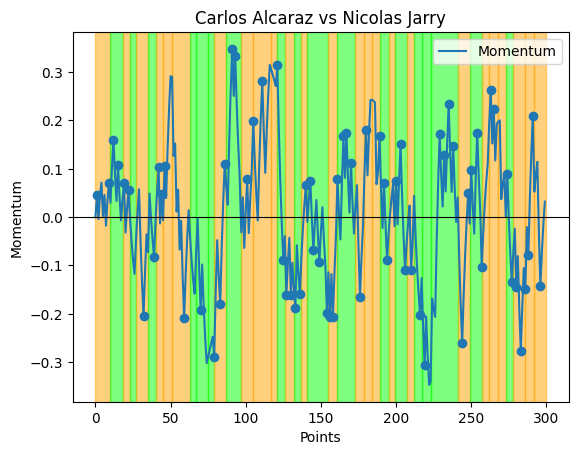

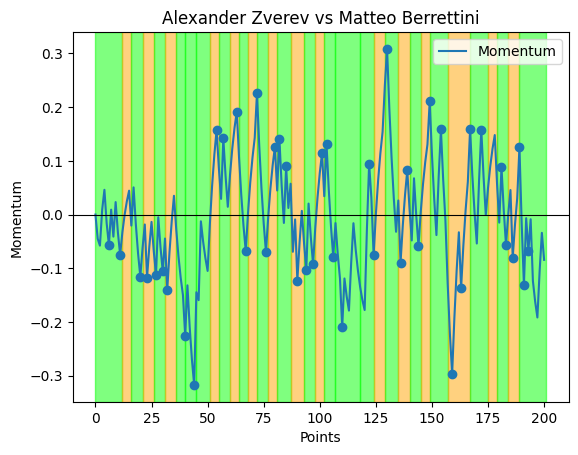

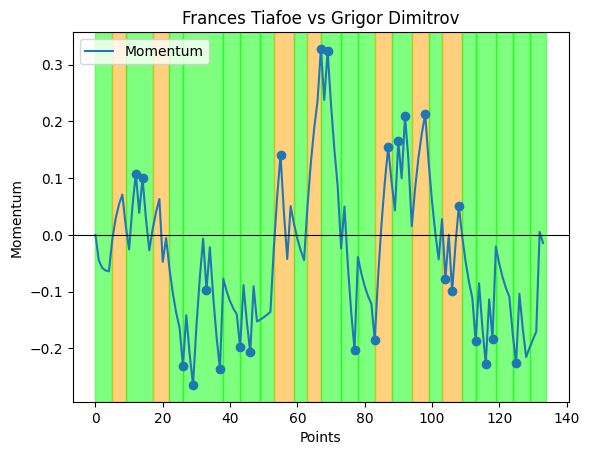

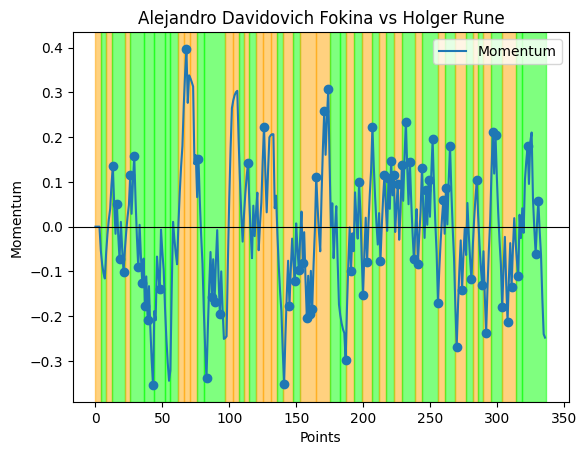

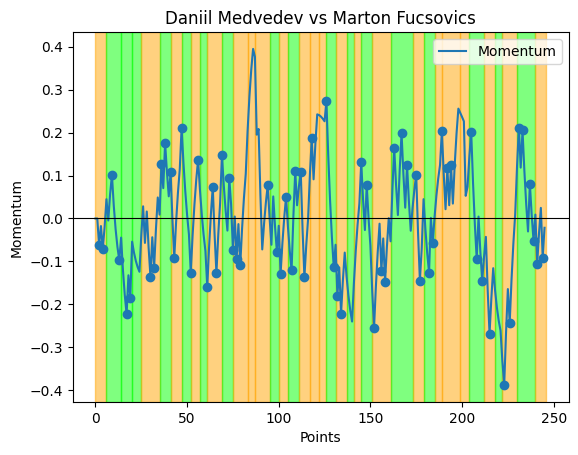

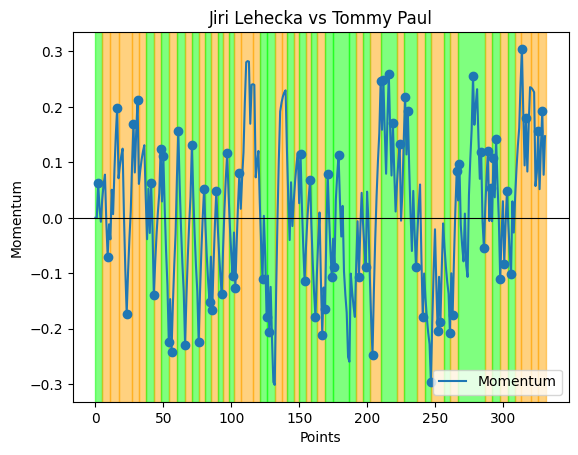

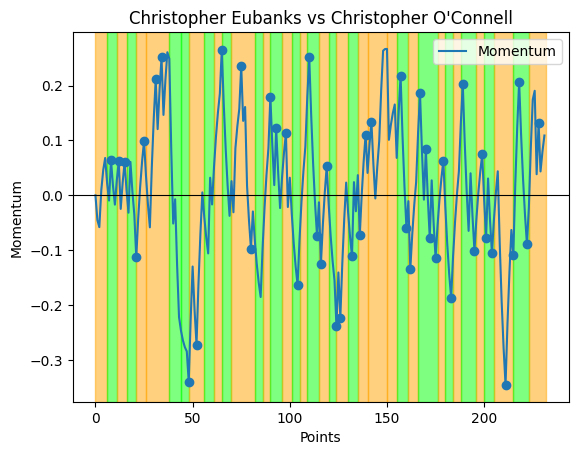

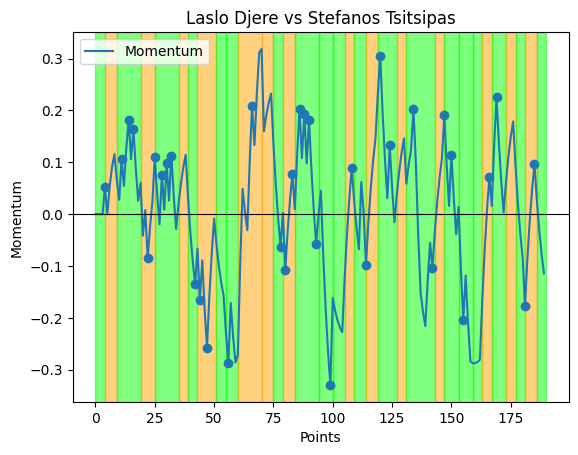

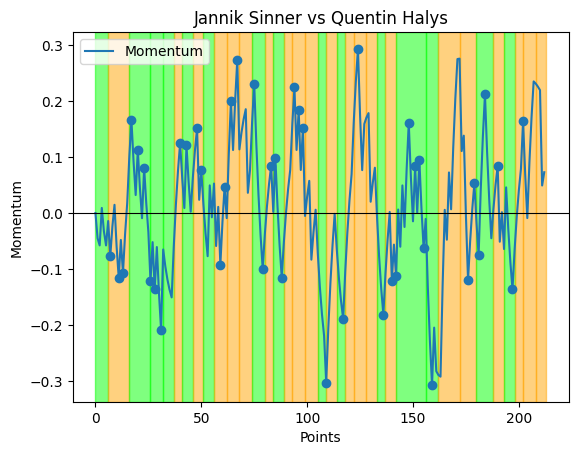

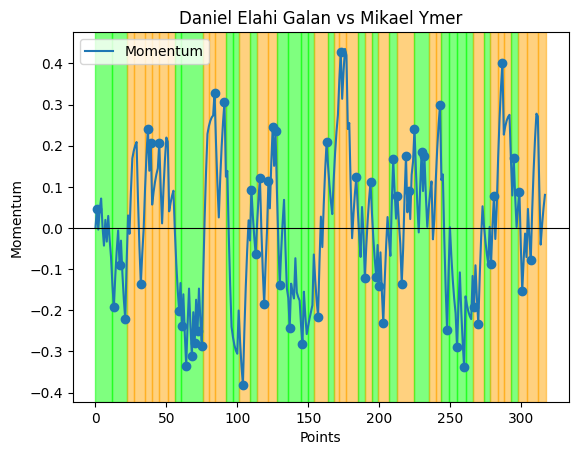

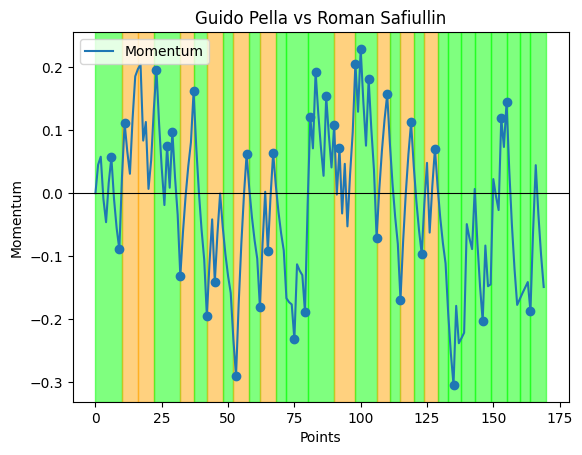

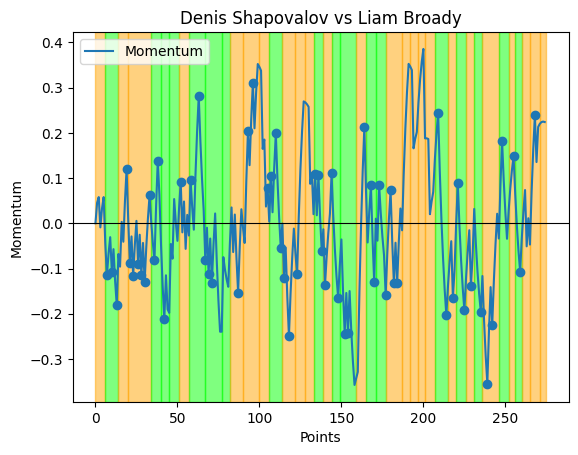

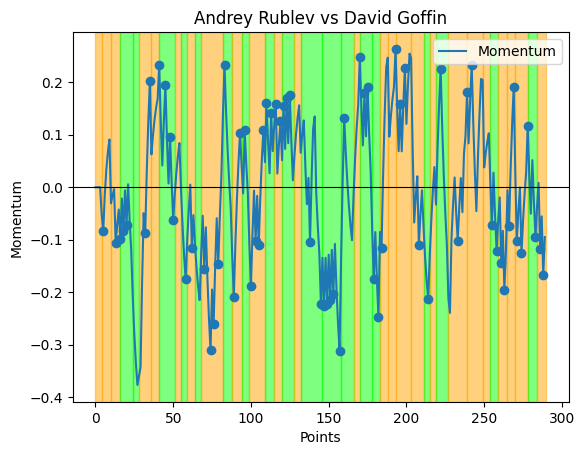

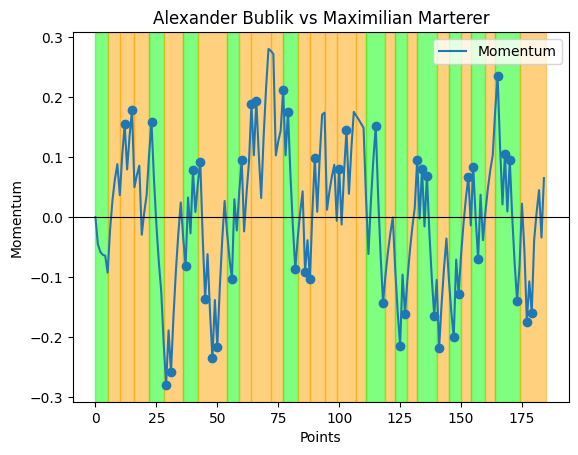

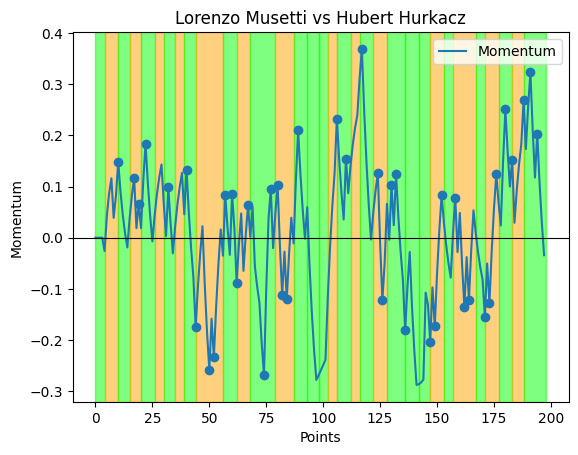

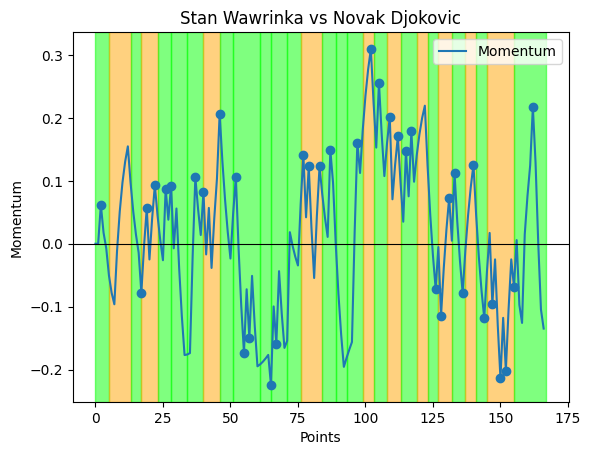

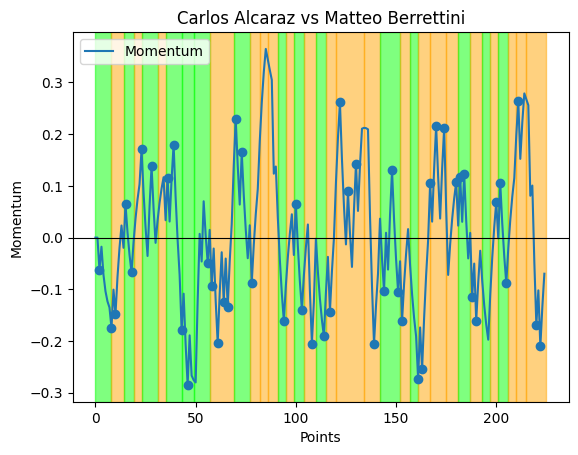

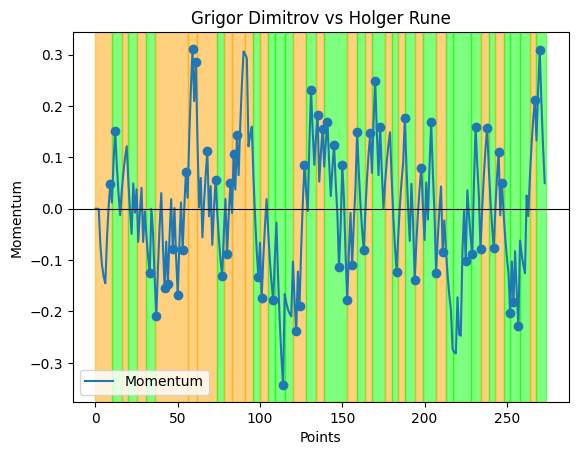

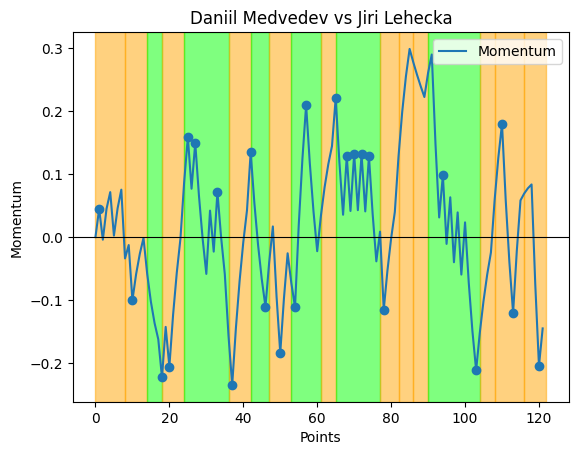

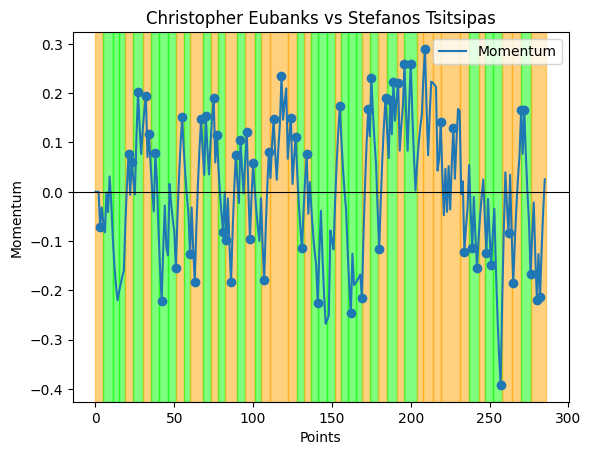

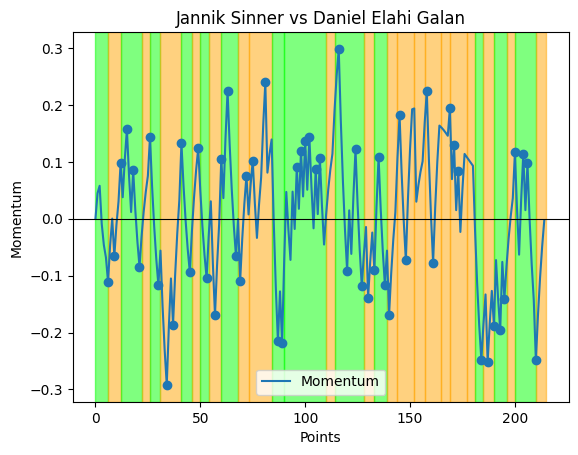

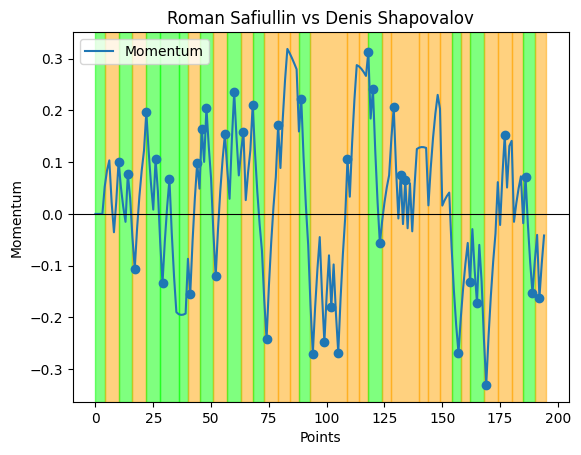

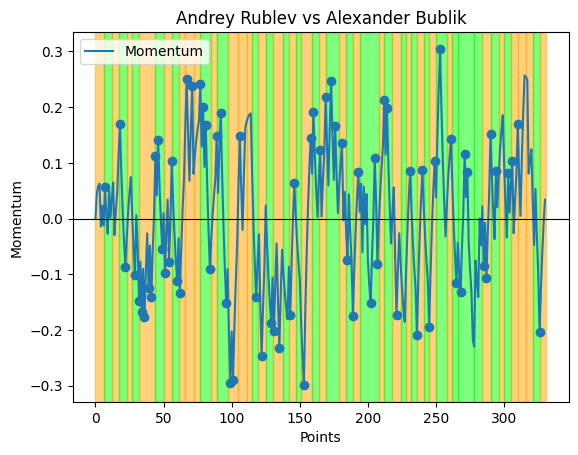

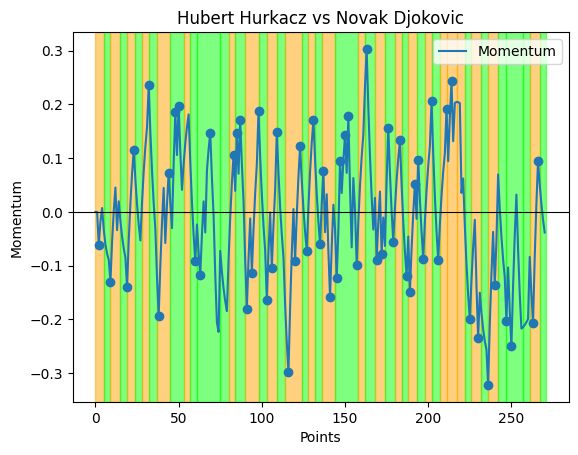

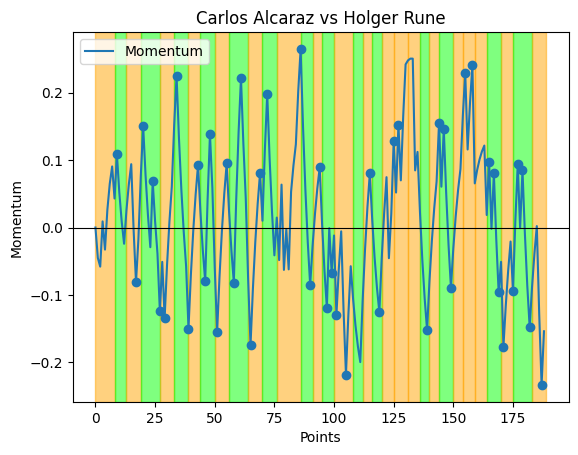

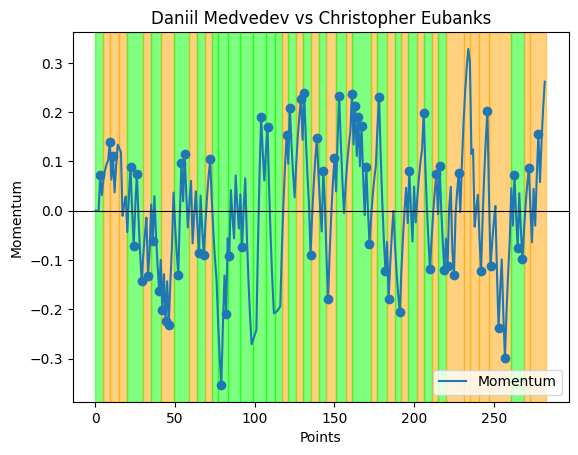

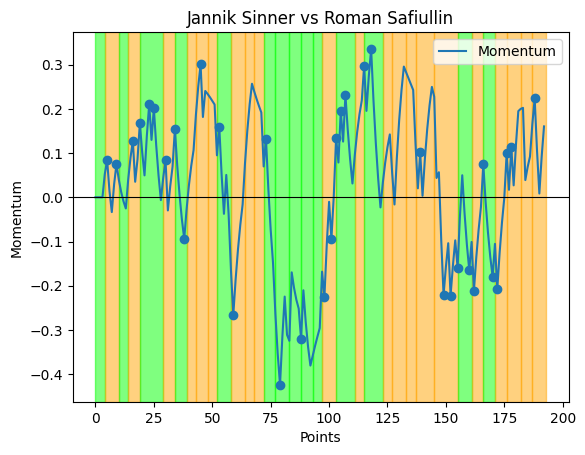

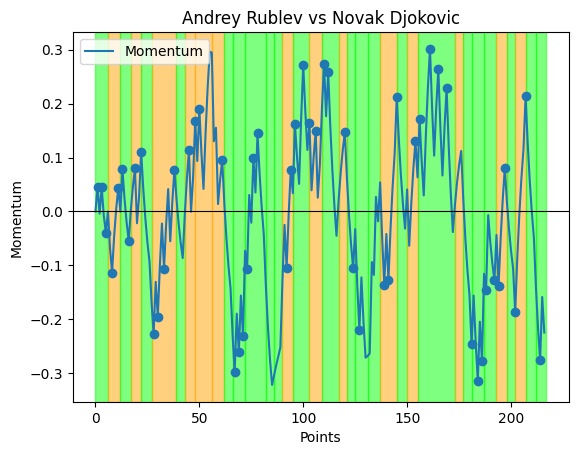

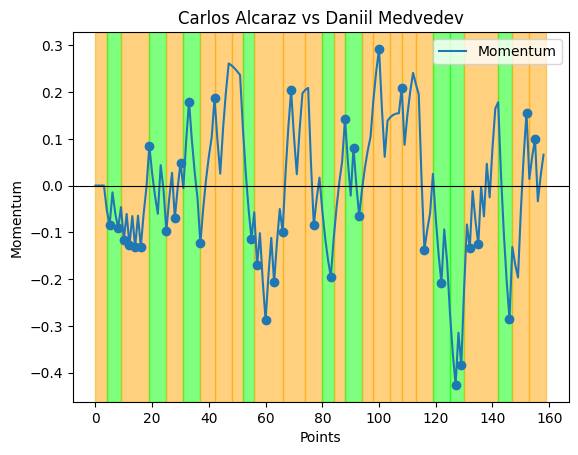

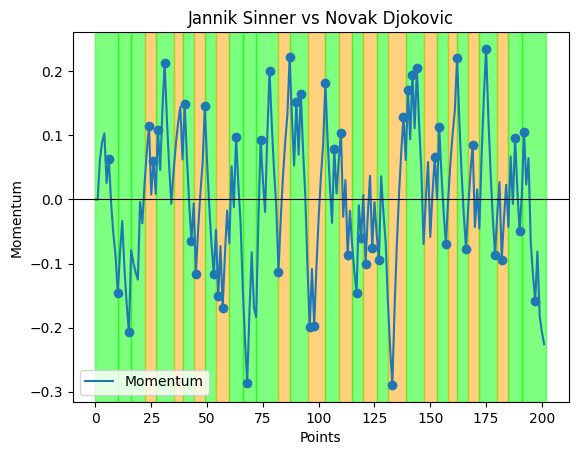

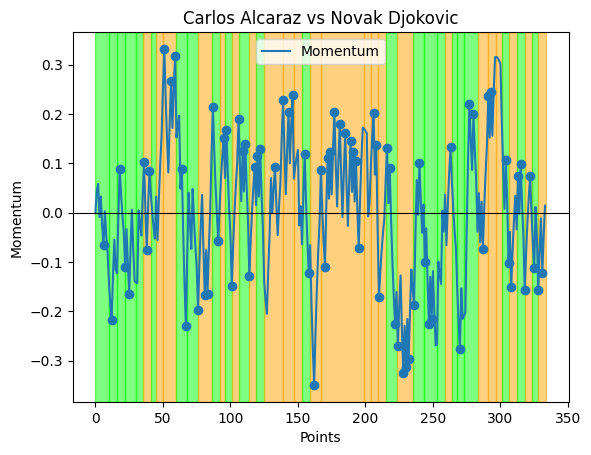

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sp

df = pd.read_csv("/content/drive/MyDrive/MCM Problem C/Resources/Data/Wimbledon_featured_matches.csv")
matchIds = df['match_id'].unique()
match_data = []
for match in matchIds:
  match_data.append(df[df['match_id'] == match].reset_index())


smoothing16 = (2/(16+1))
smoothing26 = (2/(26+1))


for match in match_data:
  p1_points = []
  p2_points = []
  for index, row in match.iterrows():
    if row['point_victor'] == 1:
      if row['server'] == 1:
        p1_points.append(1)
        p2_points.append(-0.25)
      else:
        p1_points.append(1.5)
        p2_points.append(-1)
    if row['point_victor'] == 2:
      if row['server'] == 2:
        p2_points.append(1)
        p1_points.append(-0.25)
      else:
        p2_points.append(1.5)
        p1_points.append(-1)
  p1_points = pd.Series(p1_points)
  p2_points = pd.Series(p2_points)

  ema_p1 = p1_points.ewm(alpha = smoothing16).mean()
  ema_p2 = p2_points.ewm(alpha = smoothing16).mean()
  total_points_p1 = p1_points.cumsum()
  total_points_p2 = p2_points.cumsum()

  ema2_p1 = p1_points.ewm(alpha = smoothing26).mean()
  ema2_p2 = p2_points.ewm(alpha = smoothing26).mean()

  diff = ema_p1 - ema_p2
  diff2 = ema2_p1 - ema2_p2
  macd = diff - diff2
  peaks, _ = sp.find_peaks(np.abs(macd), threshold = 0.03)

  last_point = 0
  for index, row in match.iterrows():
    this_point = row['point_no']
    if (row['game_victor'] == 1):
      plt.axvspan(last_point, this_point, alpha = 0.5, color = 'orange')
      last_point = this_point
    if (row['game_victor'] == 2):
      plt.axvspan(last_point, this_point, alpha = 0.5, color = 'lime')
      last_point = this_point

  diff = ema_p1 - ema_p2
  diff2 = ema2_p1 - ema2_p2
  macd = diff - diff2
  plt.plot(macd, label = "Momentum")
  plt.scatter(peaks,macd.loc[peaks])
  plt.xlabel("Points")
  plt.ylabel("Momentum")
  plt.axhline(0, color='black', linewidth=0.8)
  plt.legend()
  plt.title(match["player1"].iloc[0] + " vs " + match["player2"].iloc[0])
  plt.show()

Visual stuff


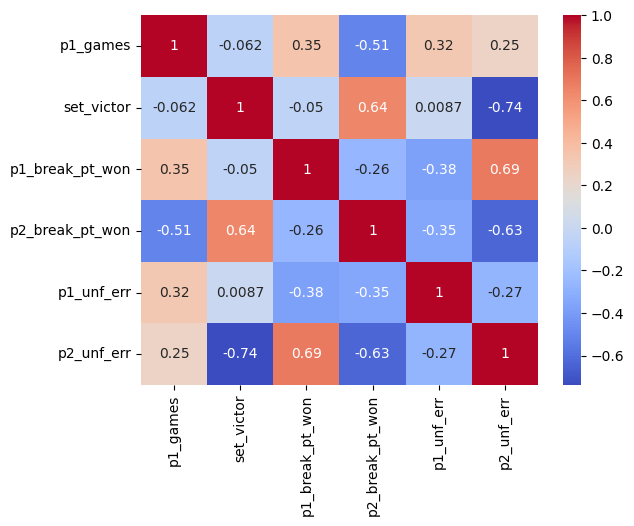

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'tennis_data'
# You may need to adjust column names based on your actual data
tennis_data = pd.read_csv("/content/drive/MyDrive/MCM Problem C/Resources/Data/Wimbledon_featured_matches.csv")

# Calculate correlation between holding service game and winning set
correlation_service_set = tennis_data['p1_games'].corr(tennis_data['set_victor'])

# Calculate probabilities of holding and breaking service games
service_probabilities = tennis_data.groupby('p1_games')['set_victor'].mean()
break_probabilities = tennis_data.groupby('p2_break_pt')['set_victor'].mean()

# Create a heatmap for different point types
heatmap_data = tennis_data[['p1_break_pt_won', 'p2_break_pt_won', 'p1_games', 'set_victor','p1_unf_err','p2_unf_err']]
heatmap_data = heatmap_data.groupby(['p1_games', 'set_victor']).mean().reset_index()
heatmap = sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm')

# Show the plots
plt.show()


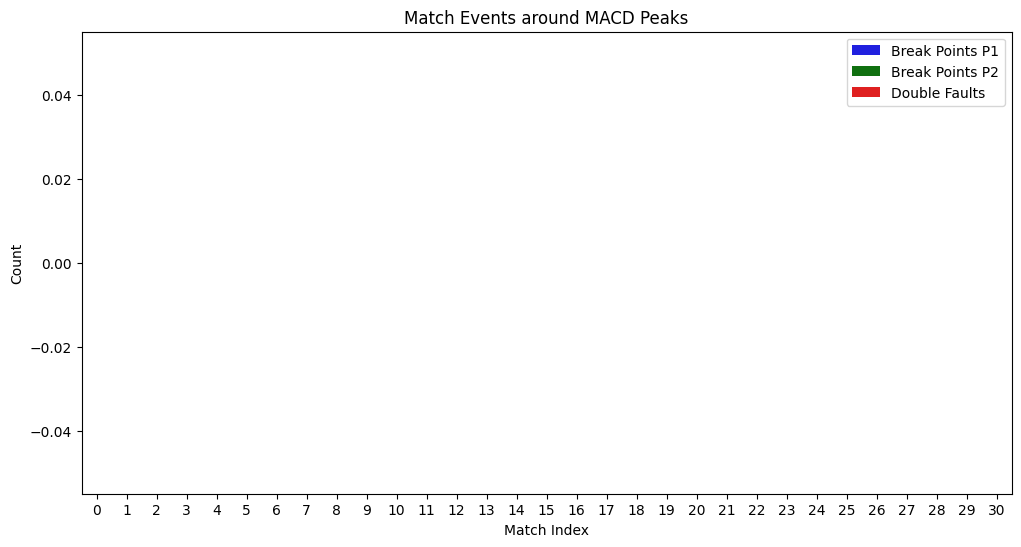

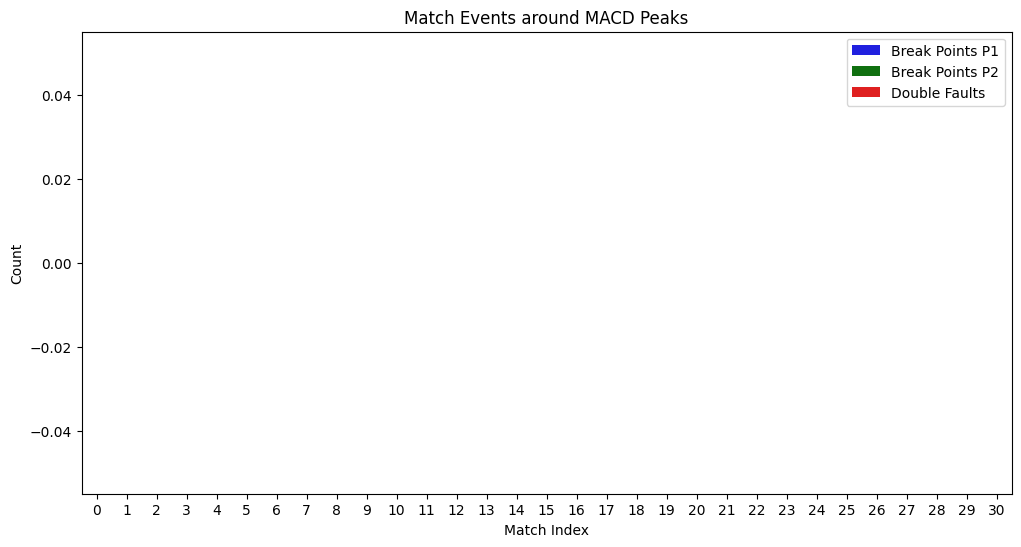

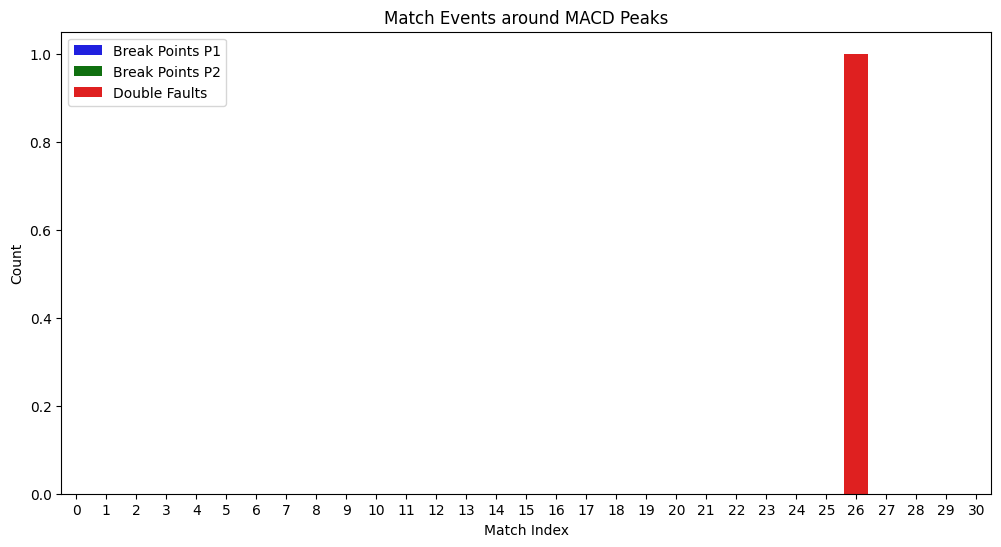

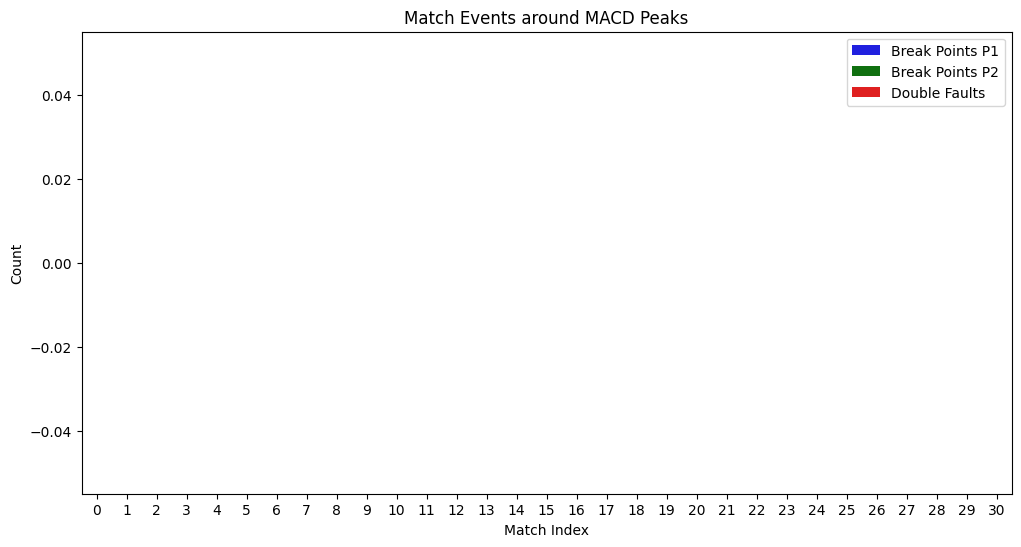

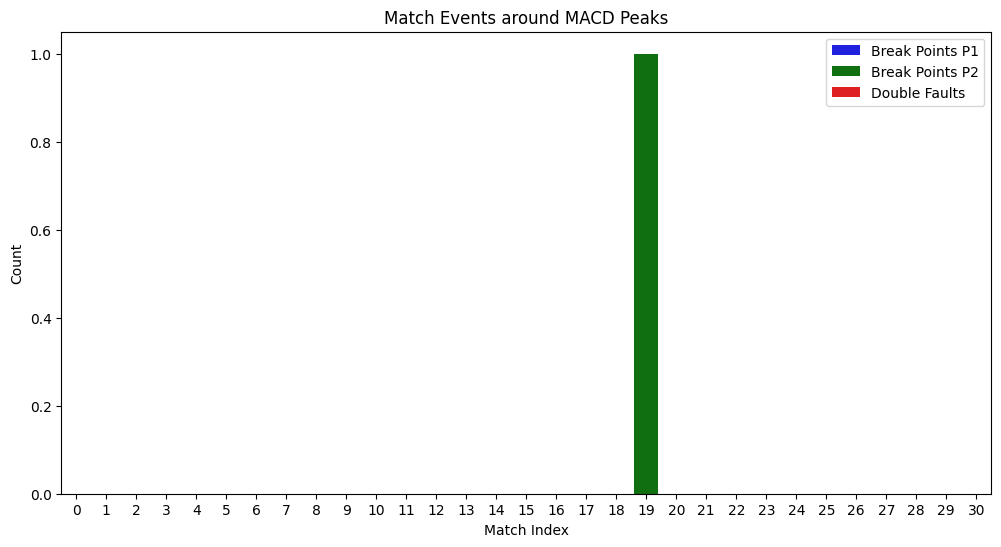

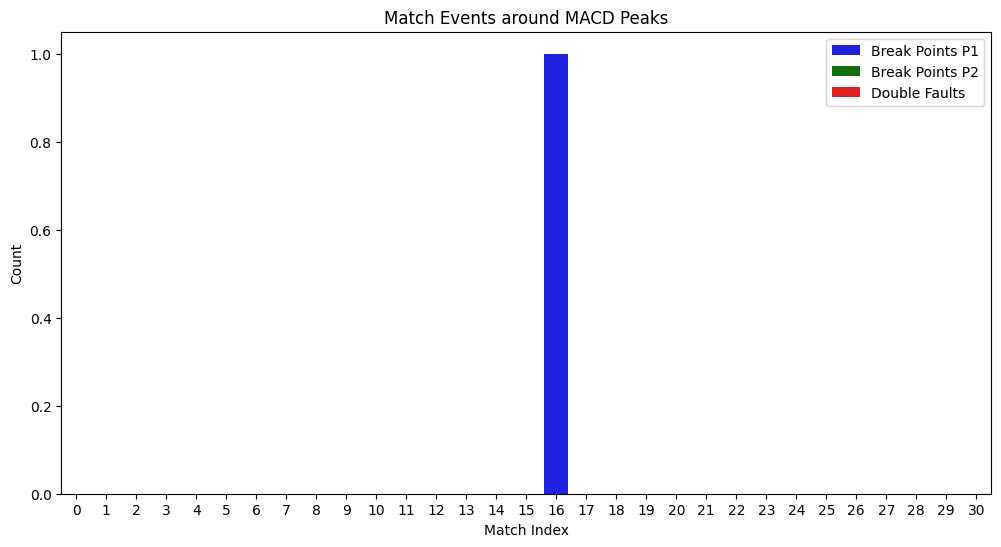

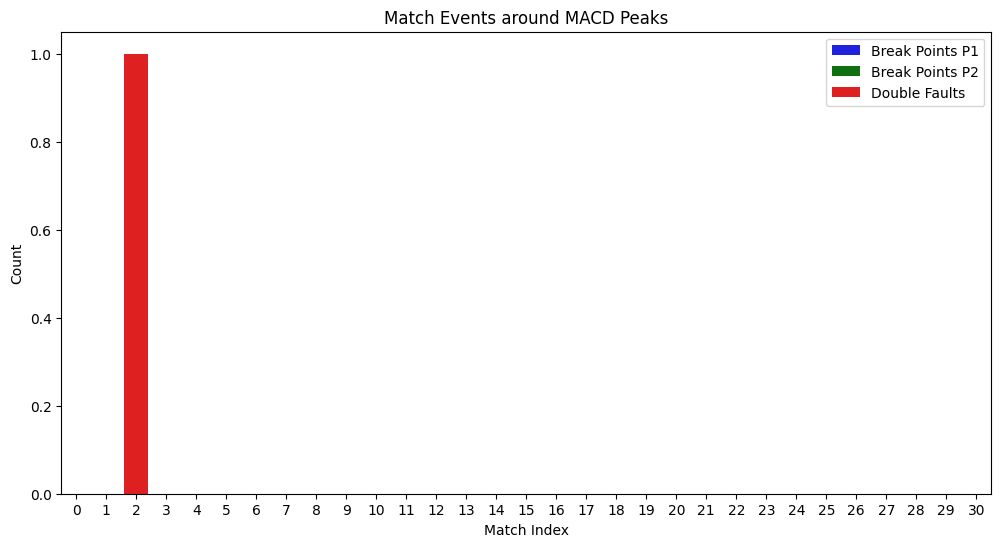

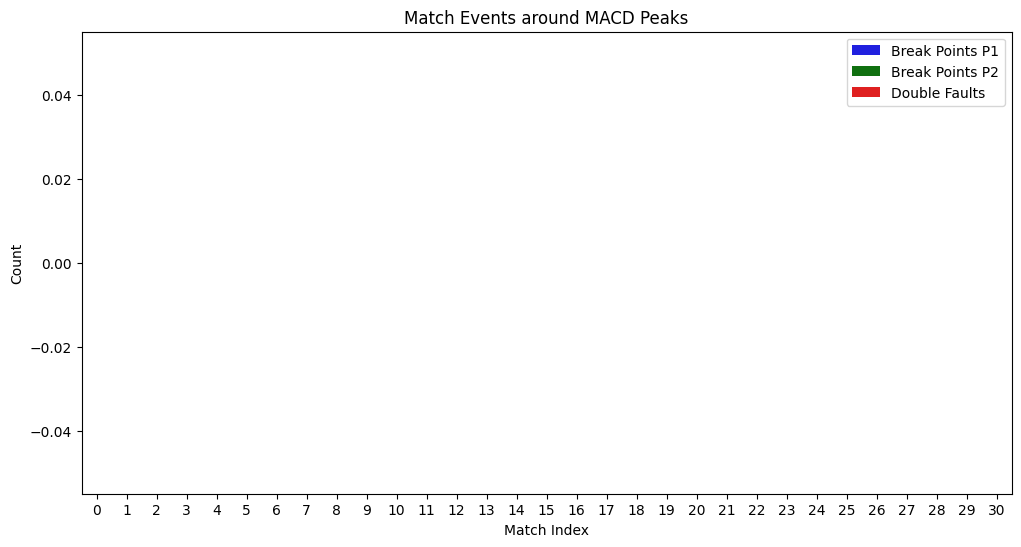

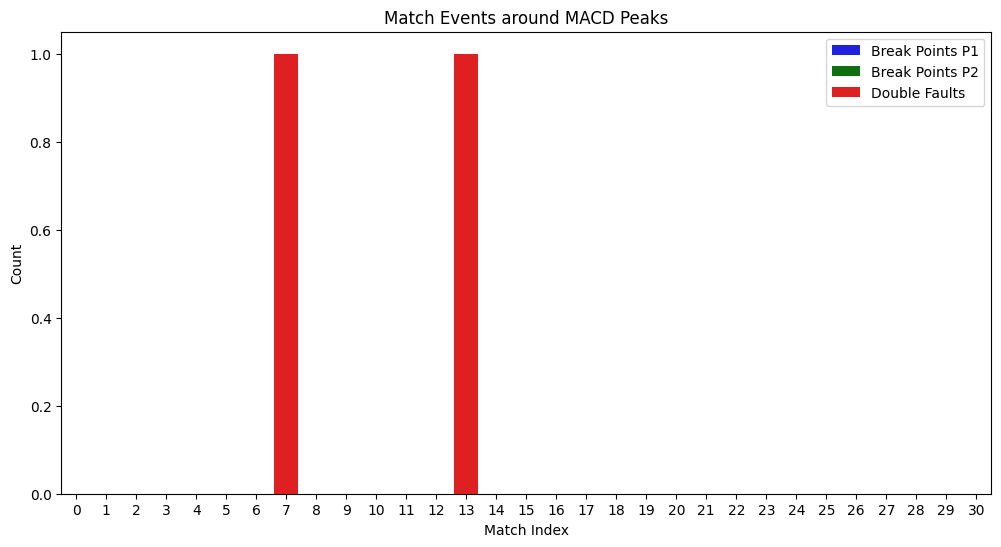

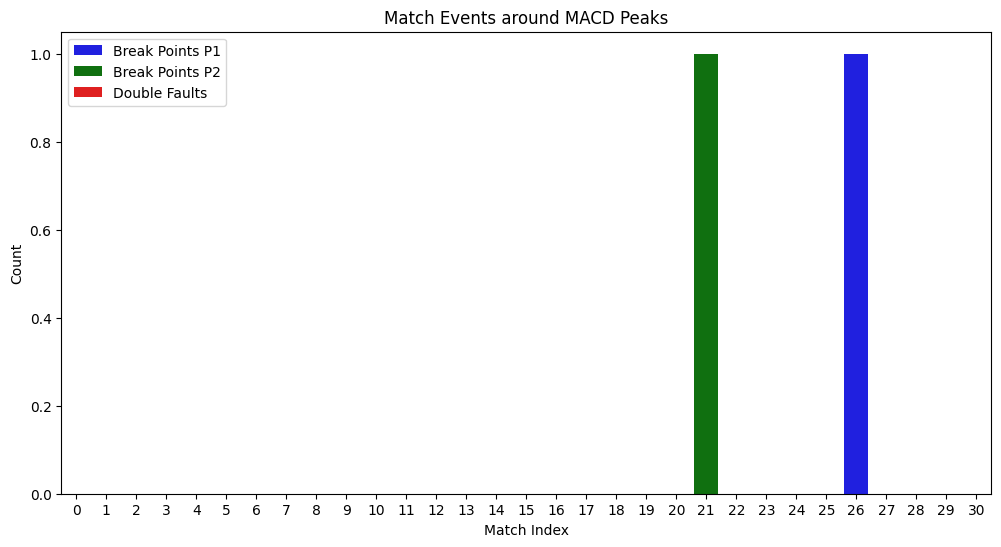

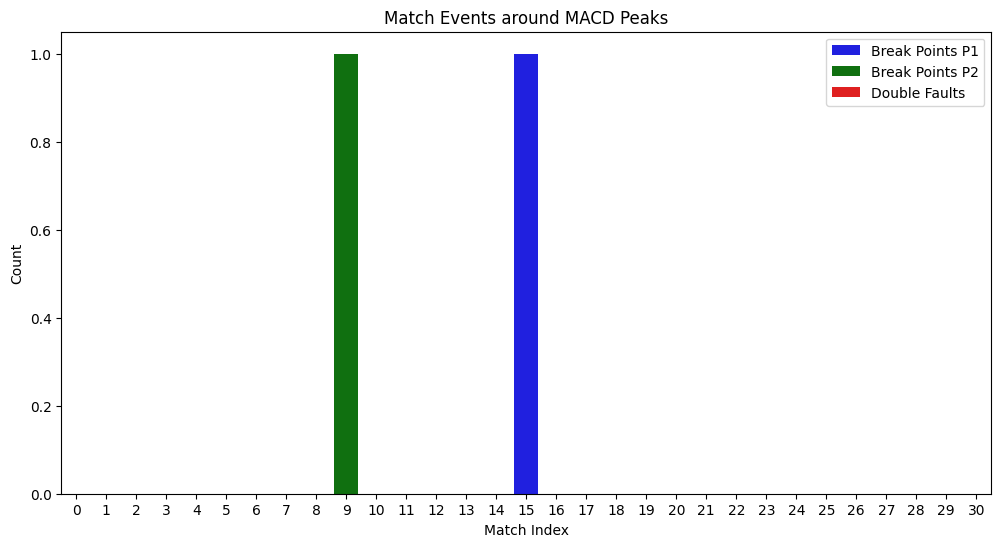

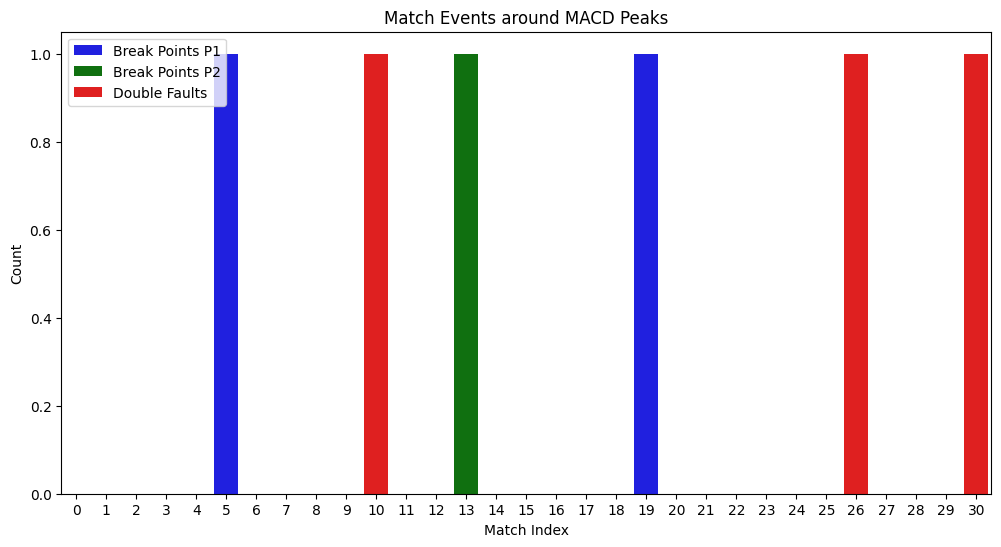

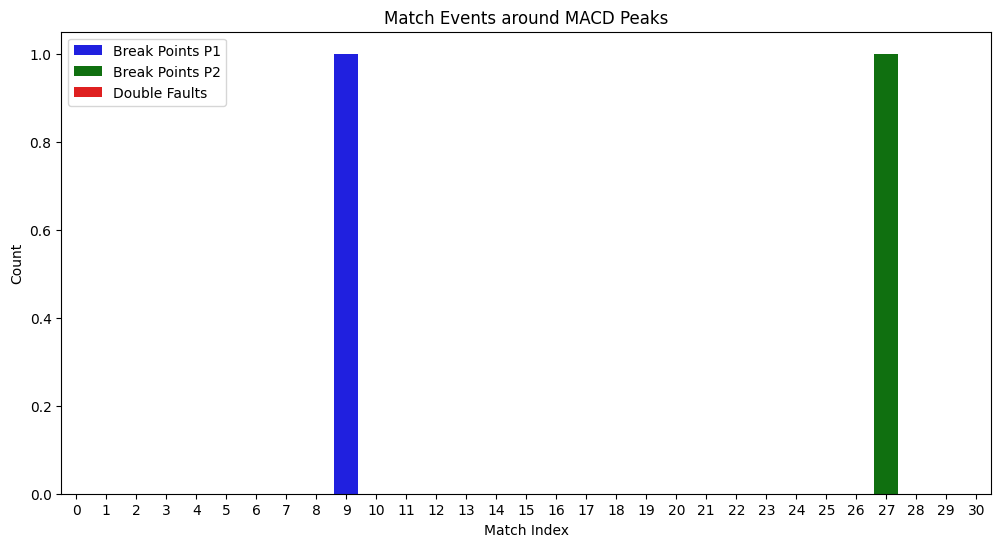

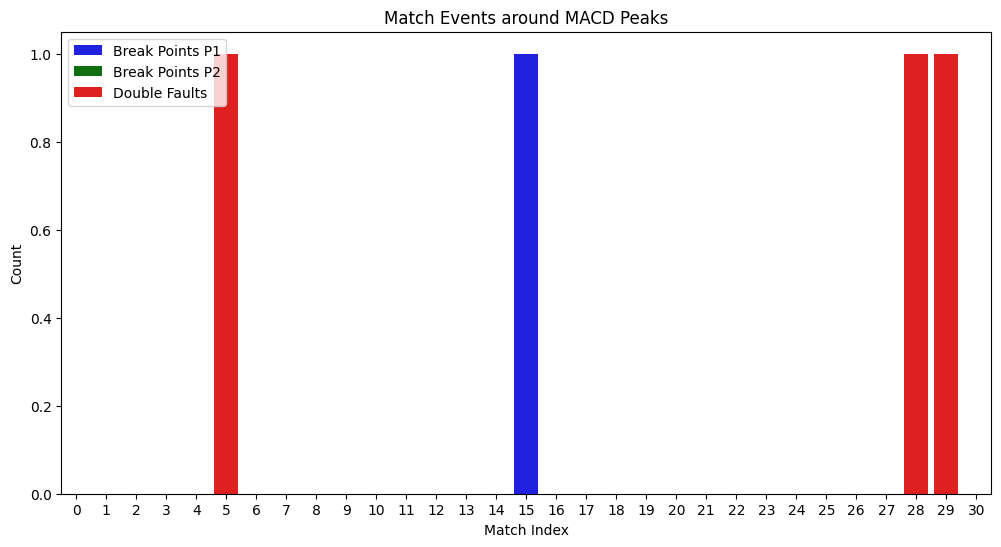

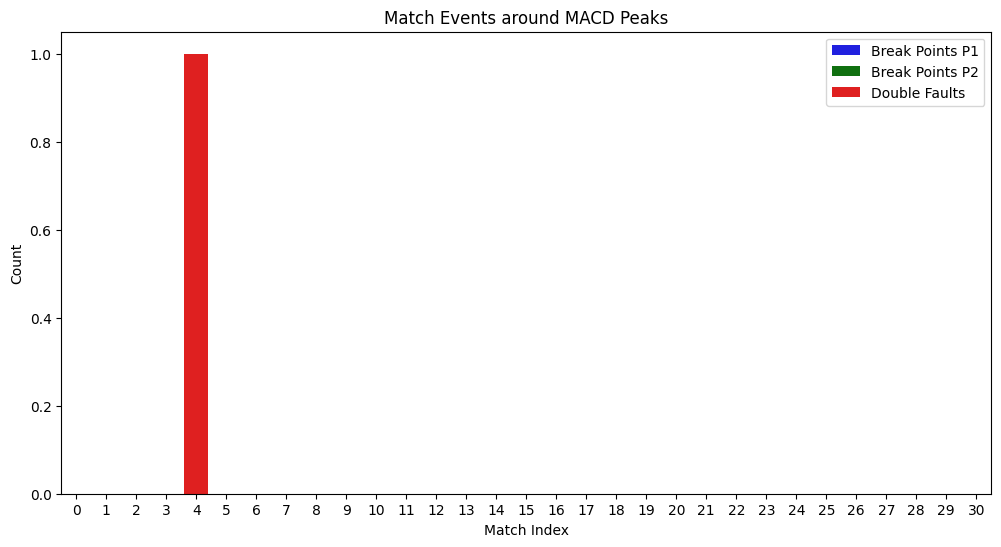

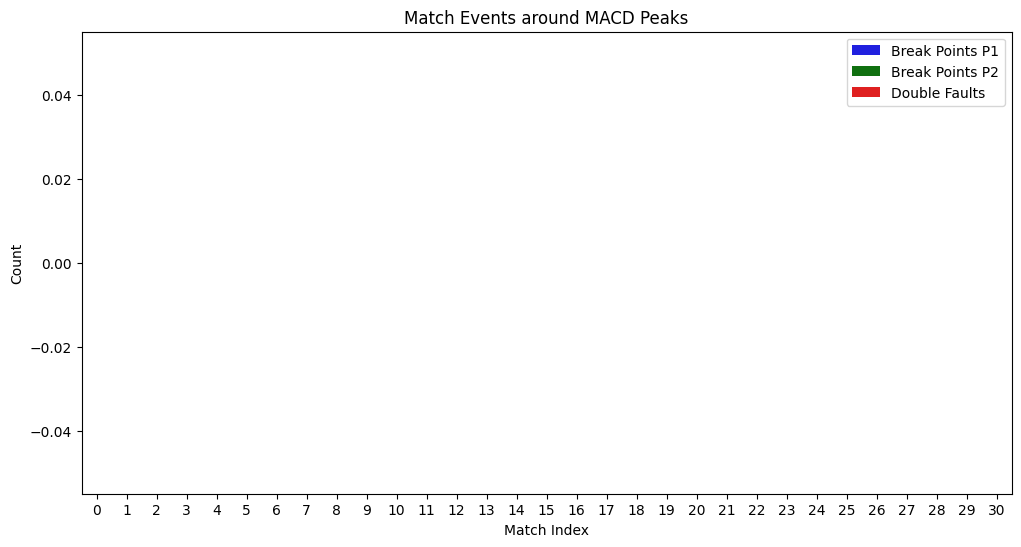

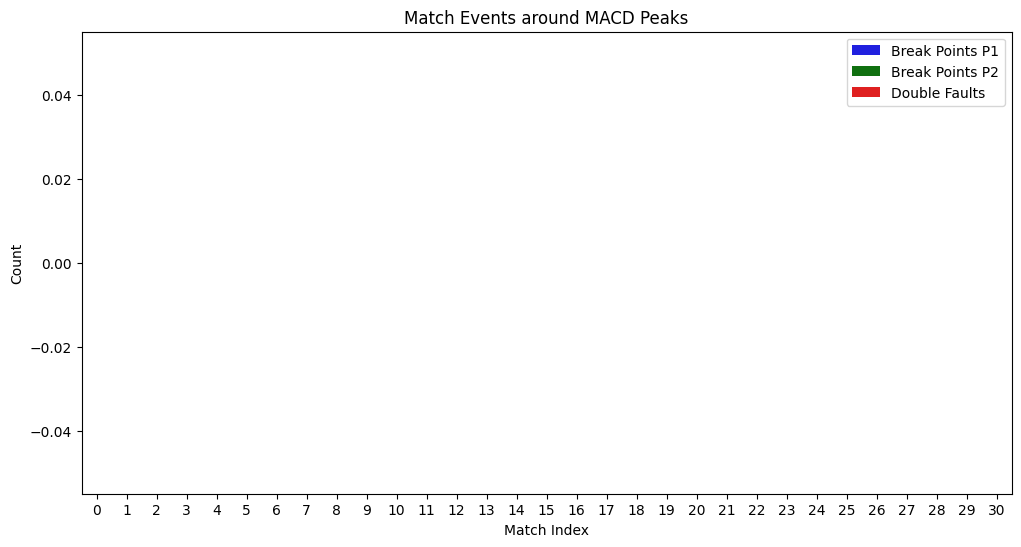

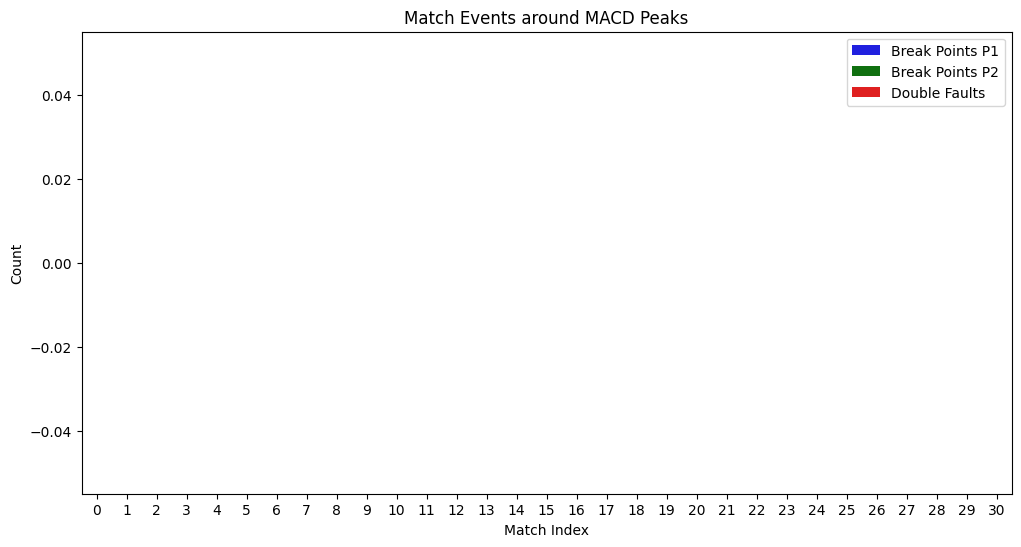

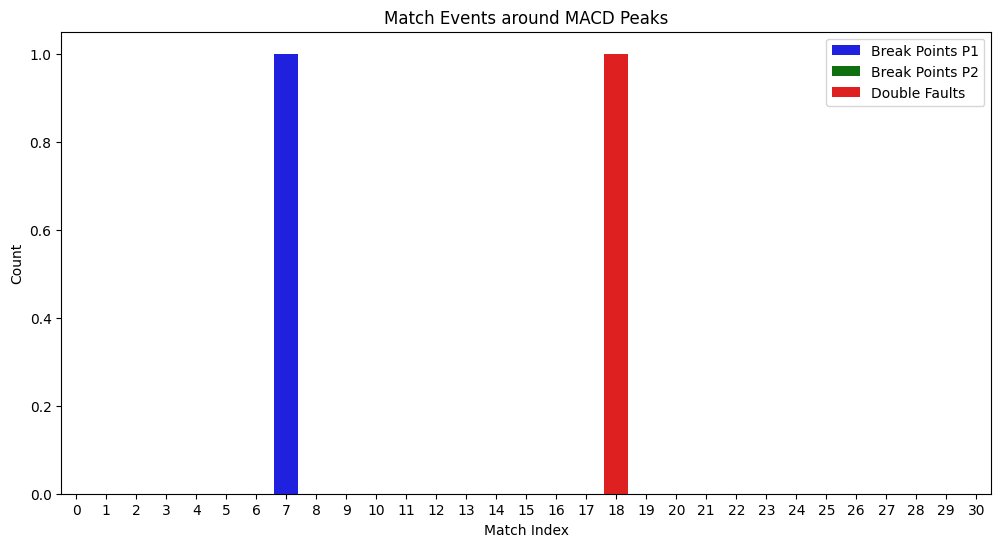

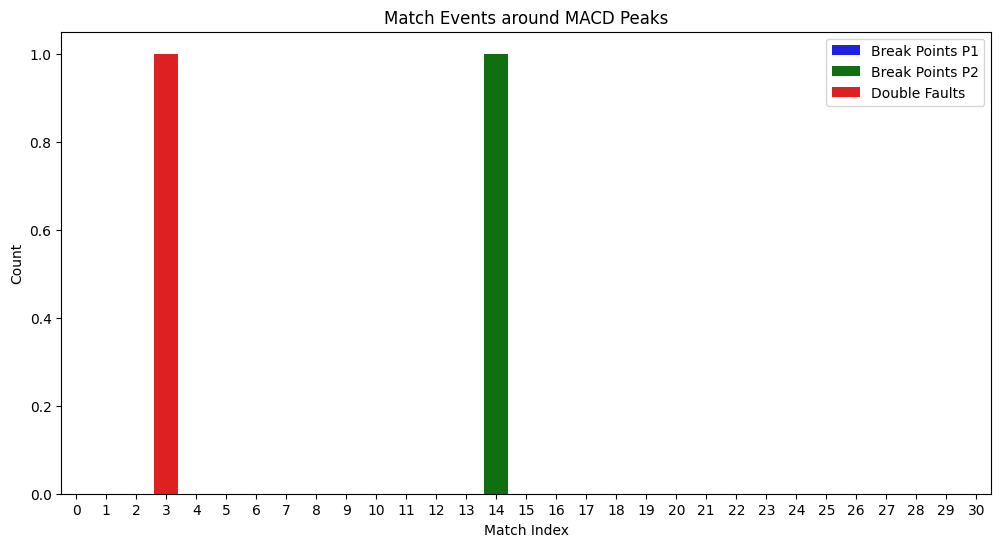

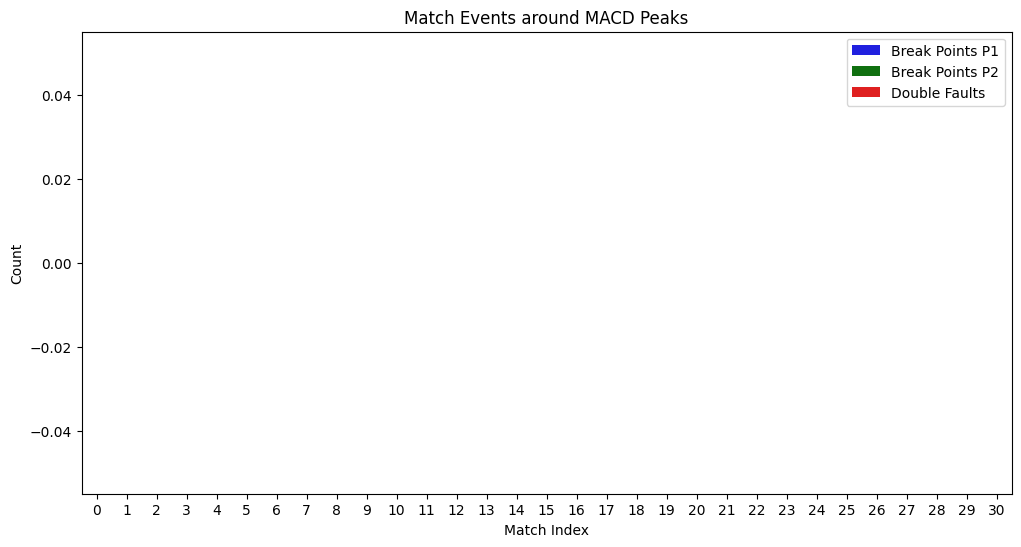

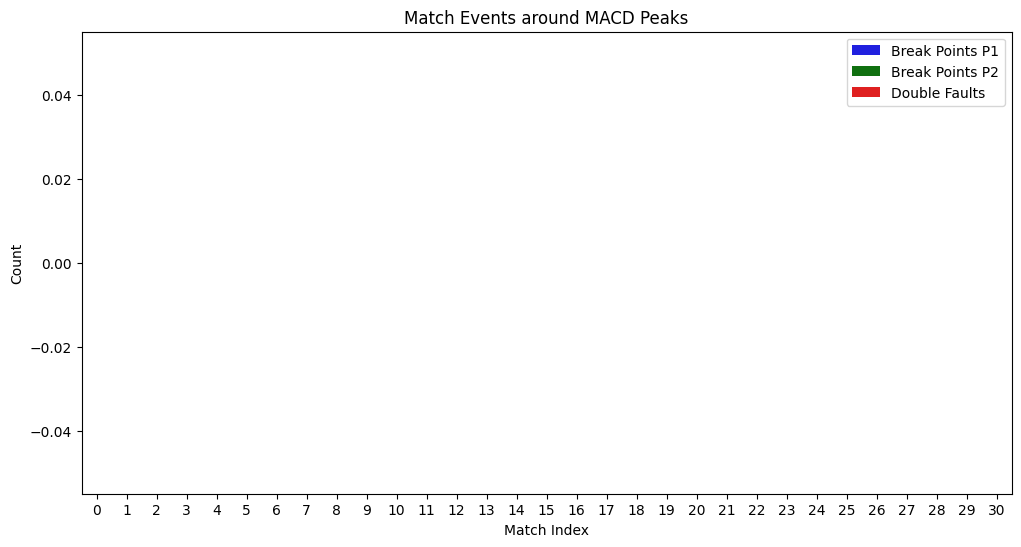

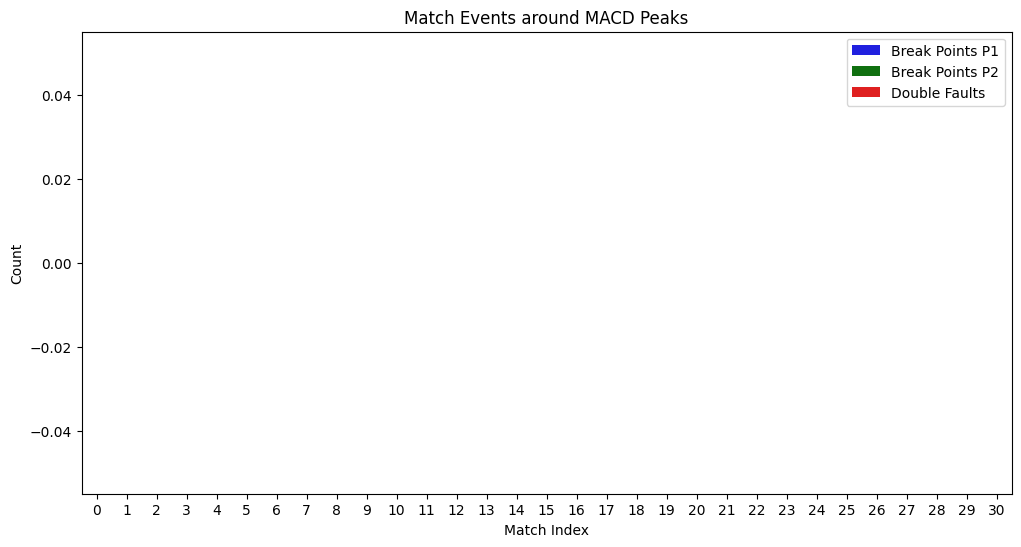

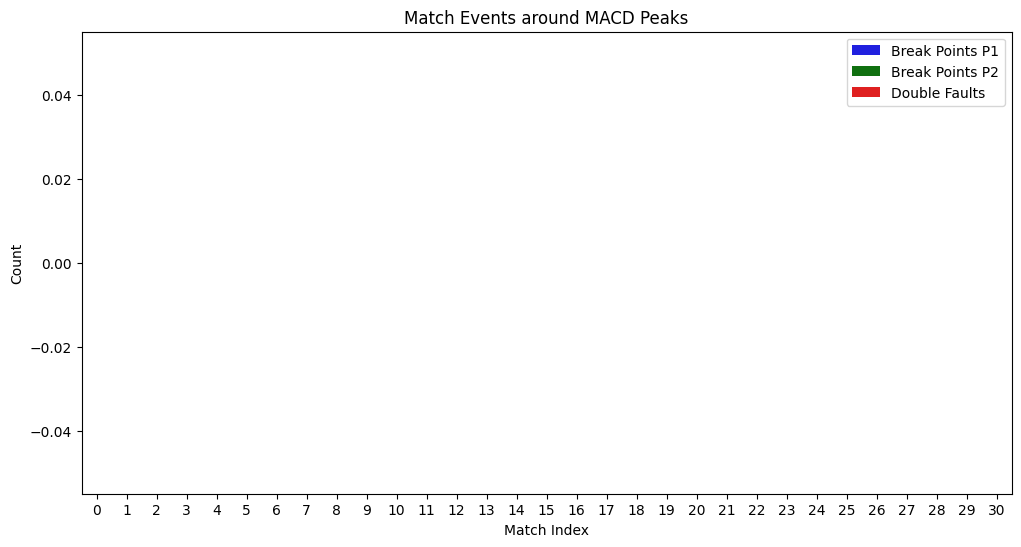

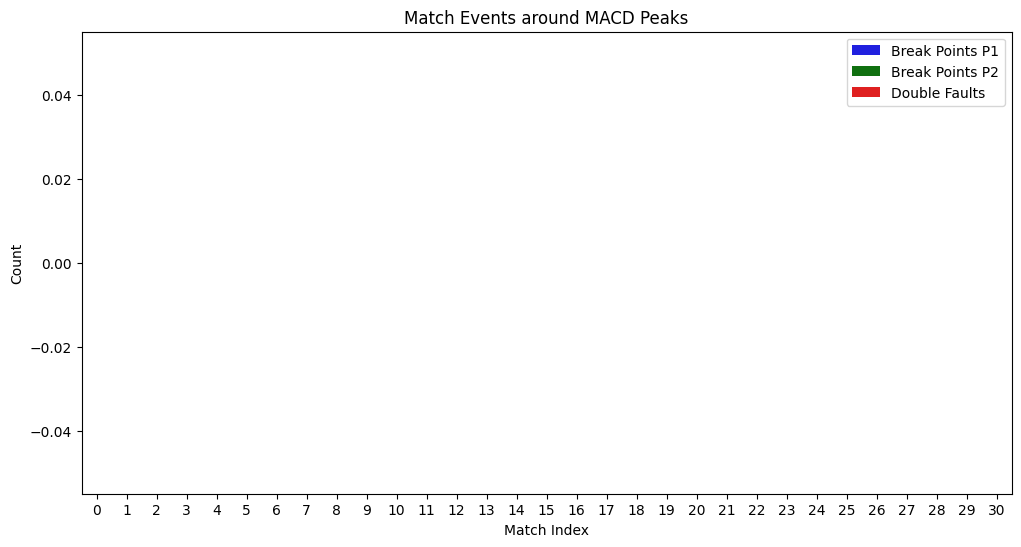

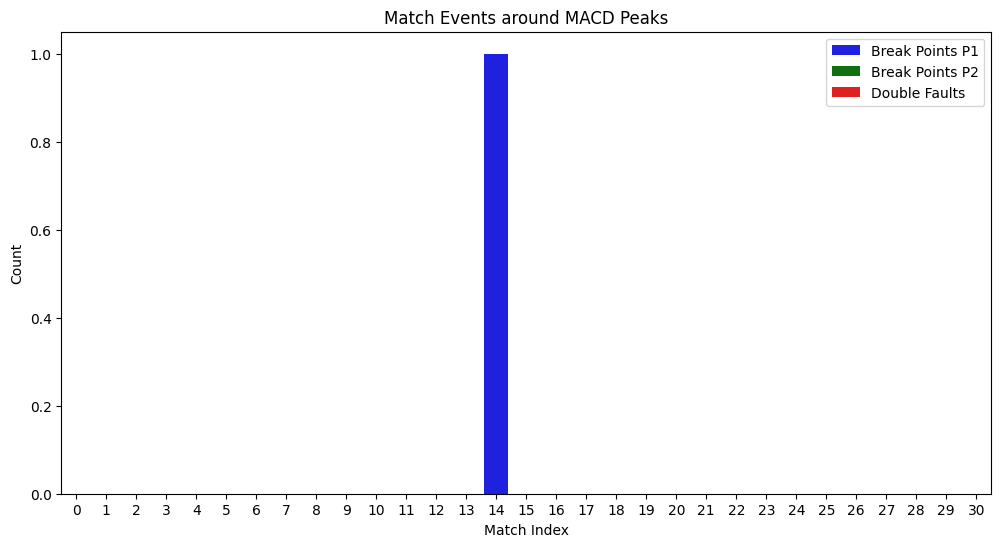

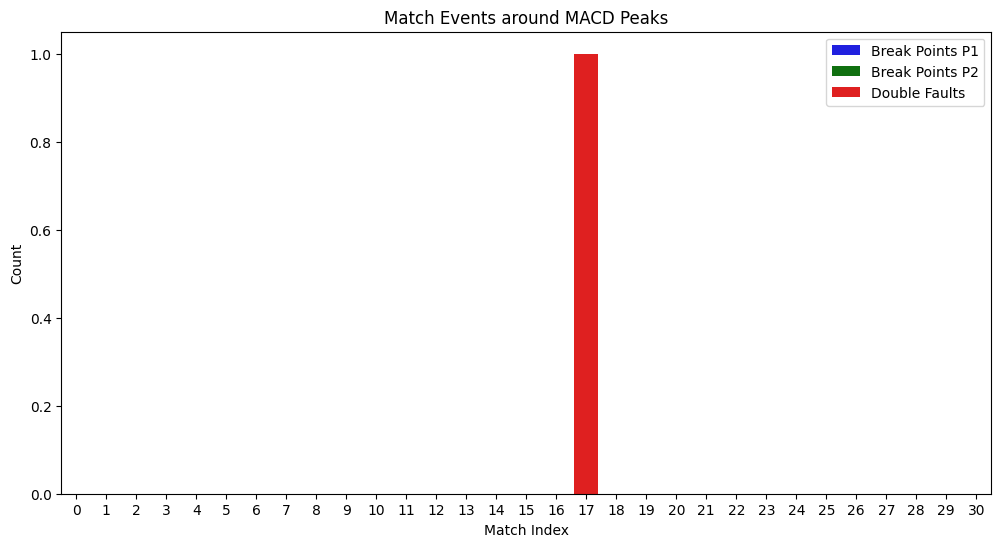

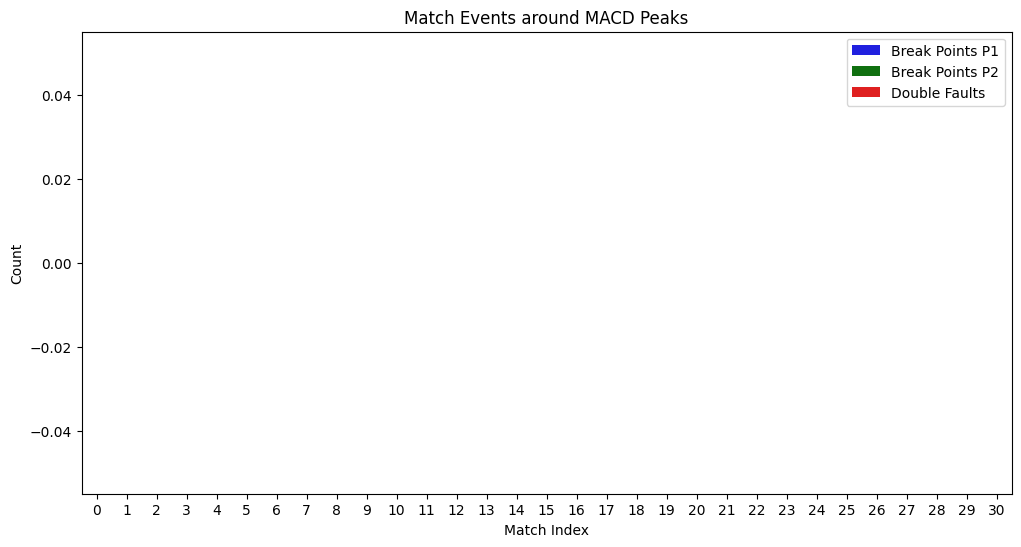

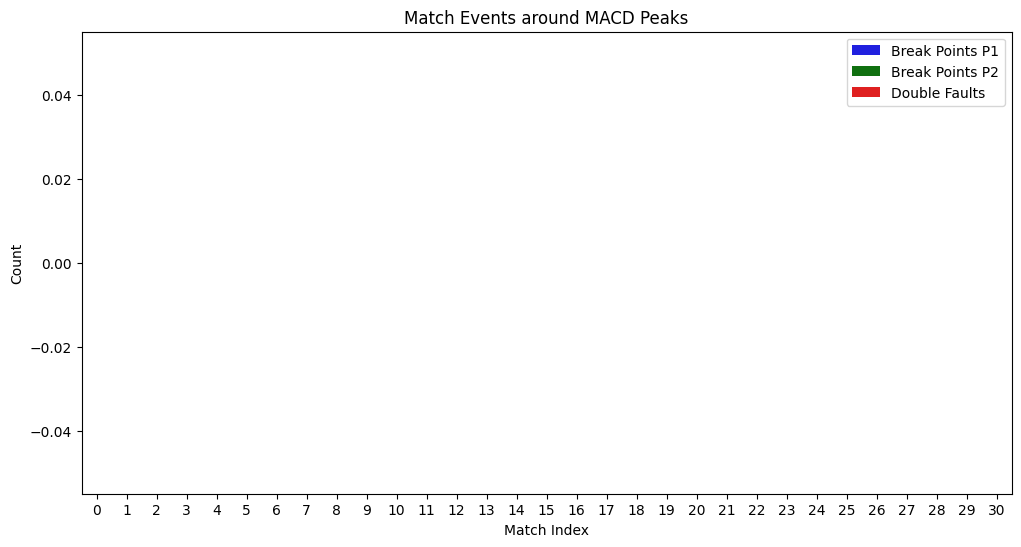

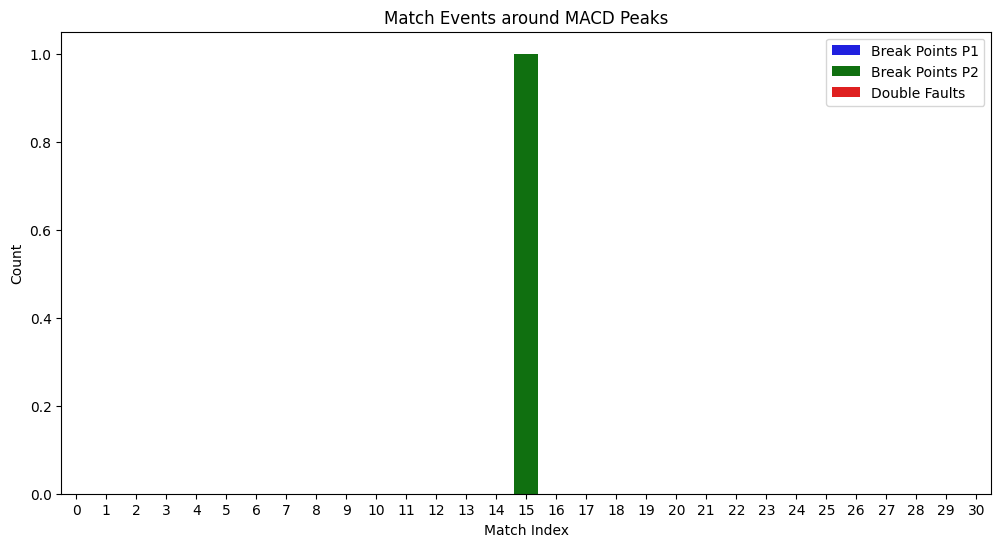

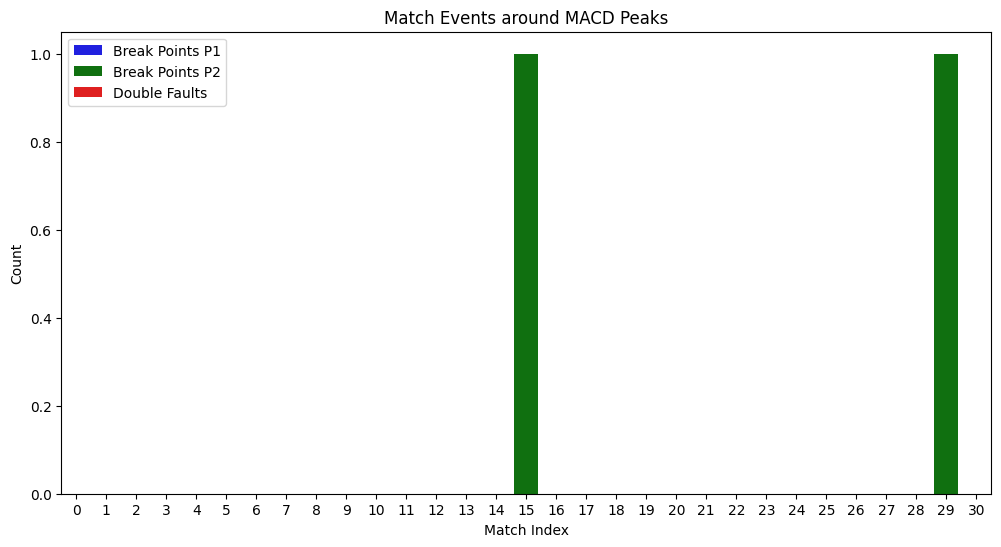

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import scipy.signal as sp

df = pd.read_csv("/content/drive/MyDrive/MCM Problem C/Resources/Data/Wimbledon_featured_matches.csv")
matchIds = df['match_id'].unique()
match_data = []
for match in matchIds:
  match_data.append(df[df['match_id'] == match].reset_index())


smoothing16 = (2/(16+1))
smoothing26 = (2/(26+1))

for match in match_data:
  p1_points = (match['point_victor'] == 1).astype(int)
  p1_points = p1_points.replace(0,-0.5)
  p2_points = (match['point_victor'] == 2).astype(int)
  p2_points = p2_points.replace(0,-0.5)

  ema_p1 = p1_points.ewm(alpha = smoothing16).mean()
  ema_p2 = p2_points.ewm(alpha = smoothing16).mean()
  total_points_p1 = p1_points.cumsum()
  total_points_p2 = p2_points.cumsum()

  ema2_p1 = p1_points.ewm(alpha = smoothing26).mean()
  ema2_p2 = p2_points.ewm(alpha = smoothing26).mean()
  diff = ema_p1 - ema_p2
  diff2 = ema2_p1 - ema2_p2
  macd = diff - diff2

  macd_peaks =sp.find_peaks(macd)[0]

  # Extract relevant match data around MACD peaks
  window_size = 20
  selected_data = match.iloc[max(0, macd_peaks[0] - window_size):min(macd_peaks[-1] + window_size, len(match_data))]
  # Create a bar chart to visualize key events
  plt.figure(figsize=(12, 6))
  sns.barplot(x=selected_data.index, y=selected_data['p1_break_pt_won'], color='blue', label='Break Points P1')
  sns.barplot(x=selected_data.index, y=selected_data['p2_break_pt_won'], color='green', label='Break Points P2')
  sns.barplot(x=selected_data.index, y=selected_data['p1_double_fault'], color='red', label='Double Faults')

  # Customize the plot
  plt.title('Match Events around MACD Peaks')
  plt.xlabel('Match Index')
  plt.ylabel('Count')
  plt.legend()
  plt.show()


# Predictive Model Using Time Series

                 p1_sets  p2_sets  p1_games  p2_games  server  point_victor  \
elapsed_time                                                                  
0 days 03:53:25        2        1         6         5       1             2   
0 days 03:54:01        2        1         6         5       1             2   
0 days 03:55:02        2        1         6         5       1             1   
0 days 03:55:34        2        1         6         5       1             1   
0 days 03:56:11        2        1         6         5       1             1   

                 p1_points_won  p2_points_won  game_victor  set_victor  
elapsed_time                                                            
0 days 03:53:25            155            141            0           0  
0 days 03:54:01            155            142            0           0  
0 days 03:55:02            156            142            0           0  
0 days 03:55:34            157            142            0           0  
0 days 0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

SARIMAX 1 RMSE: 3.2671400019620793
SARIMAX 2 RMSE: 5.569952379803715


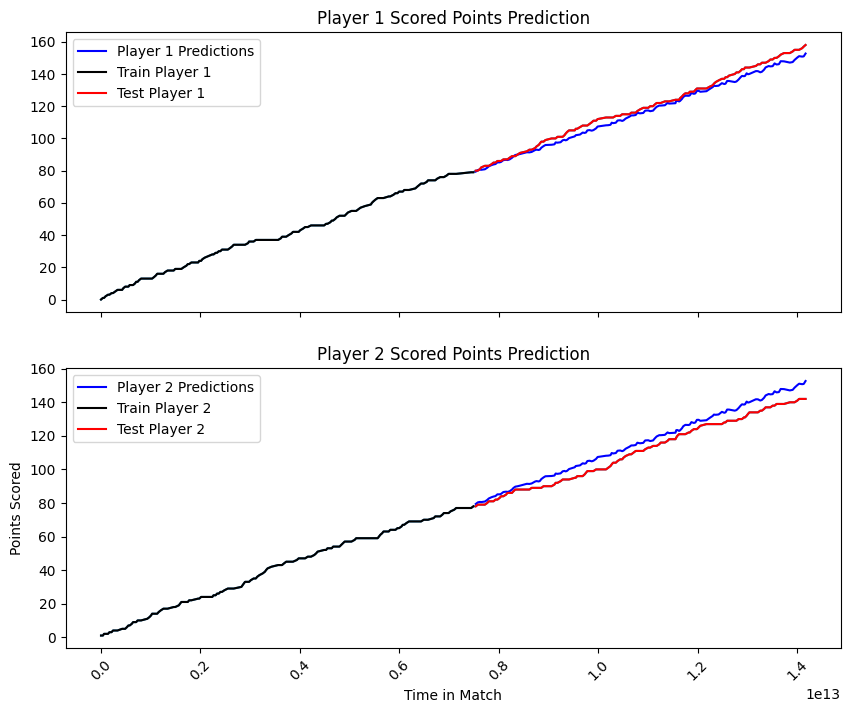

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import timedelta
from datetime import datetime

#Defines column to be read
p1 = 'p1_points_won'
p2 = 'p2_points_won'

# Read data from CSV
df = pd.read_csv("/content/drive/MyDrive/MCM Problem C/Resources/Data/Wimbledon_featured_matches.csv", delimiter=",")

# Set the subtable so that we only take data from the first match
df = df[df['match_id'] == '2023-wimbledon-1301']

# Make new csv with only wanted columns in the first game
columns_to_keep = ['elapsed_time', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'server', 'point_victor', 'p1_points_won',
                    'p2_points_won', 'game_victor', 'set_victor']
df_trim = df[columns_to_keep]
df_trim.to_csv('match1301.csv', index=False)


# Convert 'elapsed_time' to numeric format (assuming it's in HH:MM:SS format), and set it to be the index
df_trim.index = pd.to_timedelta(df_trim['elapsed_time'])
del df_trim['elapsed_time']

print(df_trim.tail())

# Use 'elapsed_time' column for plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
ax1.plot(df_trim.index, df_trim[p1])
ax2.plot(df_trim.index, df_trim[p2])

# Split data into train and test
mid_match = timedelta(
    seconds=27,
    minutes=5,
    hours=2,
)
train = df_trim[df_trim.index < mid_match]
test = df_trim[df_trim.index >= mid_match]

# Set data to be trained on
y1 = train[p1]
y2 = train[p2]

# SARIMAX Model
SARIMAX_1 = SARIMAX(y1, order=(1, 0, 1), seasonal_order=(2, 2, 2, 12))
SARIMAX_1 = SARIMAX_1.fit(max_iter = 5000)

SARIMAX_2 = SARIMAX(y1, order=(1, 0, 1), seasonal_order=(2, 2, 2, 12))
SARIMAX_2 = SARIMAX_2.fit(max_iter = 5000)

# SARIMAX Forecasting
y1_pred = SARIMAX_1.get_forecast(len(test.index))
y1_pred_df = y1_pred.conf_int(alpha=0.05)
y1_pred_df["Predictions"] = SARIMAX_1.predict(start=y1_pred_df.index[0], end=y1_pred_df.index[-1])
y1_pred_df.index = test.index
y1_pred_out = y1_pred_df["Predictions"]

y2_pred = SARIMAX_2.get_forecast(len(test.index))
y2_pred_df = y2_pred.conf_int(alpha=0.05)
y2_pred_df["Predictions"] = SARIMAX_2.predict(start=y2_pred_df.index[0], end=y2_pred_df.index[-1])
y2_pred_df.index = test.index
y2_pred_out = y2_pred_df["Predictions"]


# Plot SARIMAX
ax1.plot(y1_pred_out, color='Blue', label='Player 1 Predictions')
ax2.plot(y2_pred_out, color='Blue', label='Player 2 Predictions')

# Calculating SARIMAX RMSE
SARIMAXrmse_1 = np.sqrt(mean_squared_error(test[p1].values, y1_pred_df['Predictions']))
SARIMAXrmse_2 = np.sqrt(mean_squared_error(test[p2].values, y2_pred_df['Predictions']))
print("SARIMAX 1 RMSE:", SARIMAXrmse_1)
print("SARIMAX 2 RMSE:", SARIMAXrmse_2)

# Plot Train and Test data
ax1.plot(train[p1], color='black', label='Train Player 1')
ax1.plot(test[p1], color='red', label='Test Player 1')
ax2.plot(train[p2], color='black', label='Train Player 2')
ax2.plot(test[p2], color='red', label='Test Player 2')

plt.ylabel('Points Scored')
plt.xlabel('Time in Match')
plt.xticks(rotation=45)
ax1.set_title('Player 1 Scored Points Prediction')
ax2.set_title('Player 2 Scored Points Prediction')
ax1.legend()
ax2.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
